### **Problem Statement**

In the banking industry, detecting credit card fraud using machine learning is not just a trend; it is a necessity for banks, as they need to put proactive monitoring and fraud prevention mechanisms in place. Machine learning helps these institutions reduce time-consuming manual reviews, costly chargebacks and fees, and denial of legitimate transactions.

Suppose we are part of the analytics team working on a fraud detection model and its cost-benefit analysis. We need to develop a machine learning model to detect fraudulent transactions based on the historical transactional data of customers with a pool of merchants. In this capstone project we build a fraud detection model. Based on our understanding of the model, we have to analyse the business impact of these fraudulent transactions and recommend the optimal ways that the bank can adopt to mitigate the fraud risks.

In [ ]:
#To supress the warnings

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Import the libraries needed

import numpy as np
import pandas as pd
import seaborn as sns
import  matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


###Step 1: Reading and Understanding the data

In [ ]:
# Import the training and testing set data into the dataframe
dataset_train=pd.read_csv("/content/gdrive/My Drive/capstone/fraudTrain.csv")
dataset_test=pd.read_csv("/content/gdrive/My Drive/capstone/fraudTest.csv")

In [ ]:
dataset_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
dataset_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


##Inspect the various aspects of the dataframe


In [ ]:
dataset_train.shape,dataset_test.shape

((1296675, 23), (555719, 23))

In [ ]:
dataset_train.info(),dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

(None, None)

In [ ]:
# Checking for duplicates and dropping the entire duplicate row if any
dataset_train.drop_duplicates(subset=None, inplace=True)

In [ ]:
dataset_train.shape

(1296675, 23)

In [ ]:
dataset_train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [ ]:
#Get the column name from the dataset
column=dataset_train.columns
column

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
dataset_train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
for col in column:
    print(dataset_train[col].value_counts())

0          1
864447     1
864454     1
864453     1
864452     1
          ..
432224     1
432223     1
432222     1
432221     1
1296674    1
Name: Unnamed: 0, Length: 1296675, dtype: int64
2019-04-22 16:02:01    4
2020-06-01 01:37:47    4
2020-06-02 12:47:07    4
2019-11-18 23:03:49    3
2019-12-01 14:11:58    3
                      ..
2019-07-13 18:38:18    1
2019-07-13 18:37:26    1
2019-07-13 18:35:46    1
2019-07-13 18:35:41    1
2020-06-21 12:13:37    1
Name: trans_date_trans_time, Length: 1274791, dtype: int64
571365235126           3123
4512828414983801773    3123
36722699017270         3119
213112402583773        3117
3545109339866548       3113
                       ... 
180097223252063           7
4225628813173670          7
501894933032              7
4975457191020             7
340187018810220           7
Name: cc_num, Length: 983, dtype: int64
fraud_Kilback LLC                       4403
fraud_Cormier LLC                       3649
fraud_Schumm PLC                     

## Step 2: Exploratory Data Analysis

In [ ]:
#Merging first and last names and dropping original column
dataset_train['Name']=dataset_train['first']+' '+dataset_train['last']
dataset_test['Name']=dataset_test['first']+' '+dataset_test['last']

In [ ]:
# Checking and dropping unwanted columns
dataset_train.drop(['Unnamed: 0','first','last'],axis=1, inplace=True)
dataset_test.drop(['Unnamed: 0','first','last'],axis=1, inplace=True)

In [ ]:
#Modifying Datatypes for time and date columns and converting to datetime format
dataset_train['trans_date_trans_time'] = pd.to_datetime(dataset_train['trans_date_trans_time'], errors='coerce')
dataset_train['dob'] = pd.to_datetime(dataset_train['dob'], errors='coerce')
dataset_train['unix_time'] = pd.to_datetime(dataset_train['unix_time'], errors='coerce')

dataset_test['trans_date_trans_time'] = pd.to_datetime(dataset_test['trans_date_trans_time'], errors='coerce')
dataset_test['dob'] = pd.to_datetime(dataset_test['dob'], errors='coerce')
dataset_test['unix_time'] = pd.to_datetime(dataset_test['unix_time'], errors='coerce')

In [ ]:
#Converting dob to age and removing dob column
dataset_train['Transaction_Date'] = (dataset_train['trans_date_trans_time']).dt.date.astype('datetime64[ns]')
dataset_train['age'] = dataset_train['Transaction_Date'].dt.year - dataset_train['dob'].dt.year
dataset_train.drop('dob',1,inplace=True)

dataset_test['Transaction_Date'] = (dataset_test['trans_date_trans_time']).dt.date.astype('datetime64[ns]')
dataset_test['age'] = dataset_test['Transaction_Date'].dt.year - dataset_test['dob'].dt.year
dataset_test.drop('dob',1,inplace=True)

In [ ]:
#Creating new columns for the age group
bins=[0,19,31,41,51,61,90]
slot=['0-18','19-30','31-40','41-50','51-60','>61']
dataset_train["age_range"]=pd.cut(dataset_train["age"],bins,labels=slot)

bins=[0,19,31,41,51,61,90]
slot=['0-18','19-30','31-40','41-50','51-60','>61']
dataset_test["age_range"]=pd.cut(dataset_test["age"],bins,labels=slot)

In [ ]:
#Creating new columns by splitting time and date columns
dataset_train['trans_year']=pd.DatetimeIndex(dataset_train['trans_date_trans_time']).year
dataset_train['trans_month']=pd.DatetimeIndex(dataset_train['trans_date_trans_time']).month
dataset_train['trans_time']=pd.DatetimeIndex(dataset_train['trans_date_trans_time']).hour

dataset_test['trans_year']=pd.DatetimeIndex(dataset_test['trans_date_trans_time']).year
dataset_test['trans_month']=pd.DatetimeIndex(dataset_test['trans_date_trans_time']).month
dataset_test['trans_time']=pd.DatetimeIndex(dataset_test['trans_date_trans_time']).hour

In [ ]:
#Creating month name from the month value
import calendar
dataset_train['Month_name'] = dataset_train['trans_month'].apply(lambda x: calendar.month_abbr[x])

dataset_test['Month_name'] = dataset_test['trans_month'].apply(lambda x: calendar.month_abbr[x])



In [ ]:
!pip install haversine

In [ ]:
import haversine as hs
from haversine import Unit

In [ ]:
def haversine_np(lon1, lat1, lon2, lat2):
  lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
  dlon = lon2 - lon1
  dlat = lat2 - lat1
  a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
  c = 2 * np.arcsin(np.sqrt(a))
  km = 6371 * c  #6367
  return km
 

In [ ]:
#Distance between people co-ord and merchant co-ord
dataset_train['distance_people_to_merchant_co-ord(kms)'] = haversine_np(dataset_train['long'],dataset_train['lat'],dataset_train['merch_long'],dataset_train['merch_lat'])
#longitude first, latitude second
dataset_test['distance_people_to_merchant_co-ord(kms)'] = haversine_np(dataset_test['long'],dataset_test['lat'],dataset_test['merch_long'],dataset_test['merch_lat'])

In [ ]:
dataset_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,...,is_fraud,Name,Transaction_Date,age,age_range,trans_year,trans_month,trans_time,Month_name,distance_people_to_merchant_co-ord(kms)
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,...,0,Jennifer Banks,2019-01-01,31,19-30,2019,1,0,Jan,78.597568
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,...,0,Stephanie Gill,2019-01-01,41,31-40,2019,1,0,Jan,30.212176
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,...,0,Edward Sanchez,2019-01-01,57,51-60,2019,1,0,Jan,108.206083
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,...,0,Jeremy White,2019-01-01,52,51-60,2019,1,0,Jan,95.673231
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,...,0,Tyler Garcia,2019-01-01,33,31-40,2019,1,0,Jan,77.556744


In [ ]:
dataset_train['distance_people_to_merchant_co-ord(kms)'].describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99])

count    1.296675e+06
mean     7.611465e+01
std      2.911693e+01
min      2.225452e-02
1%       1.109684e+01
5%       2.474071e+01
25%      5.533491e+01
50%      7.823175e+01
75%      9.850327e+01
95%      1.204954e+02
99%      1.320528e+02
max      1.521172e+02
Name: distance_people_to_merchant_co-ord(kms), dtype: float64

In [ ]:
object_columns=dataset_train.select_dtypes(include=['object'])
object_columns

,merchant,category,gender,street,city,state,job,trans_num,Name,Month_name
0,"fraud_Rippin, Kub and Mann",misc_net,F,561 Perry Cove,Moravian Falls,NC,"Psychologist, counselling",0b242abb623afc578575680df30655b9,Jennifer Banks,Jan
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,F,43039 Riley Greens Suite 393,Orient,WA,Special educational needs teacher,1f76529f8574734946361c461b024d99,Stephanie Gill,Jan
2,fraud_Lind-Buckridge,entertainment,M,594 White Dale Suite 530,Malad City,ID,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,Edward Sanchez,Jan
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,M,9443 Cynthia Court Apt. 038,Boulder,MT,Patent attorney,6b849c168bdad6f867558c3793159a81,Jeremy White,Jan
4,fraud_Keeling-Crist,misc_pos,M,408 Bradley Rest,Doe Hill,VA,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,Tyler Garcia,Jan
...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,M,162 Jessica Row Apt. 072,Hatch,UT,Geoscientist,440b587732da4dc1a6395aba5fb41669,Erik Patterson,Jun
1296671,fraud_Abernathy and Sons,food_dining,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,"Production assistant, television",278000d2e0d2277d1de2f890067dcc0a,Jeffrey White,Jun
1296672,fraud_Stiedemann Ltd,food_dining,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,Naval architect,483f52fe67fabef353d552c1e662974c,Christopher Castaneda,Jun
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,M,42933 Ryan Underpass,Manderson,SD,Volunteer coordinator,d667cdcbadaaed3da3f4020e83591c83,Joseph Murray,Jun


In [ ]:
#Seperating the fraud and non-fraud records for further analysis
fraud_train_cases=dataset_train[dataset_train['is_fraud']==1]
non_fraud_train_cases=dataset_train[dataset_train['is_fraud']==0]

#Seperating the fraud and non-fraud records for further analysis
fraud_test_cases=dataset_test[dataset_test['is_fraud']==1]
non_fraud_test_cases=dataset_test[dataset_test['is_fraud']==0]

### Univariate Analysis

In [ ]:
#Function for plotting the count plot of fraud cases
def count_plot(variable):
    plt.figure(figsize=[14,5])
    plt.style.use('ggplot')
    
    sns.countplot(fraud_train_cases[variable])
    plt.title("Bar chart showing count of the {} responsible for fraud".format(variable),fontdict={'fontsize':20,'fontweight':5,'color':'black'})
    plt.xlabel("{}".format(variable),fontdict={'fontsize':12,'fontweight':5,'color':'black'})
    plt.ylabel("count",fontdict={'fontsize':12,'fontweight':5,'color':'black'})
    plt.xticks(rotation=90)
    plt.show()

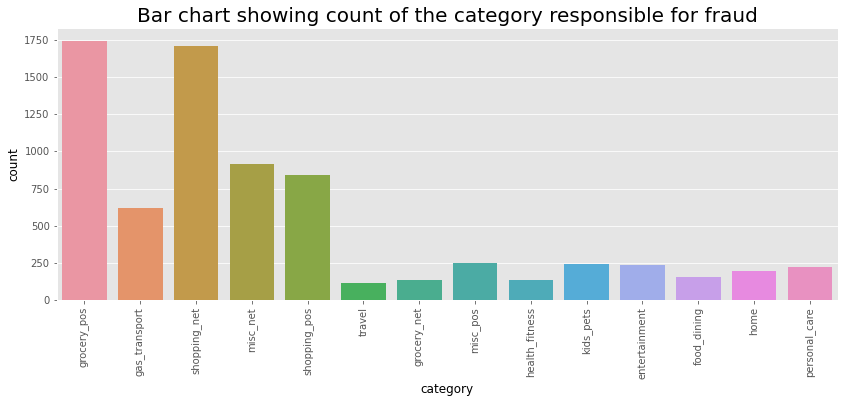

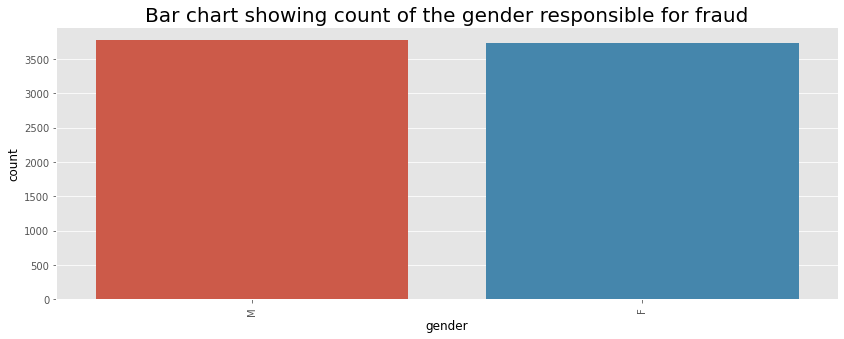

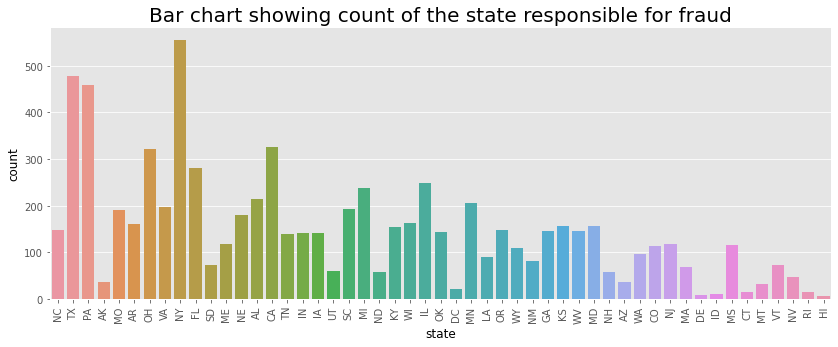

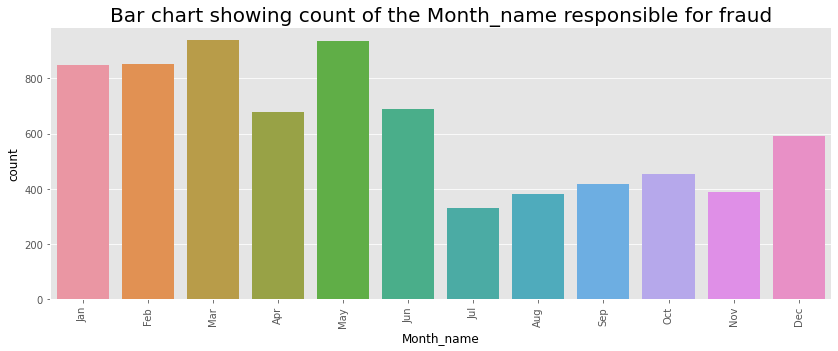

In [ ]:
#Plotting the count plot for 'category','gender','state','Month_name'
columns=['category','gender','state','Month_name']
for col in columns:
    count_plot(col)
    

## Inference:

*   grocery_pos , shopping_net,misc_net Catergory have more chance of fraud.
*   Not much can be inferred from gender.Fraud is equally distributed among men and women customer.
*   New york,Texas ,Pennsylvania have many fraud cases reported.
*   Jan-June has more counts of fraud reported than the next half.









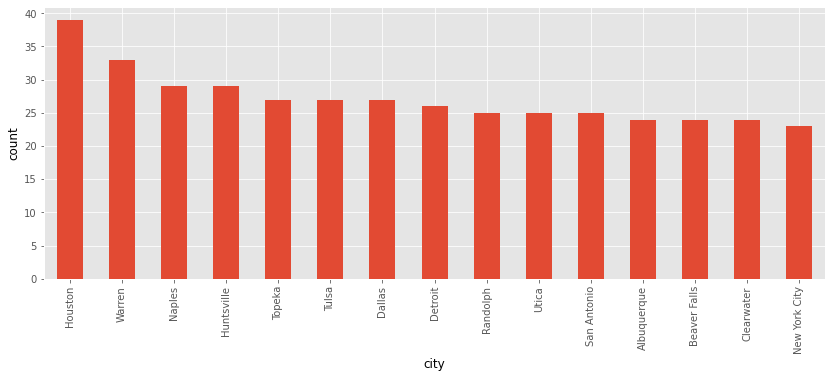

In [ ]:
# Plotting the bar chart for the top 15 cities with high number of frauds 
fraud_train_cases.groupby('city')['is_fraud'].sum().sort_values(ascending=False).head(15).plot(kind='bar', figsize=(14,5))
plt.xlabel("{}".format('city'),fontdict={'fontsize':12,'fontweight':5,'color':'black'})
plt.ylabel("count",fontdict={'fontsize':12,'fontweight':5,'color':'black'})
plt.xticks(rotation=90)
plt.show()


## Inference:


*   Housten and Warren city have high count of fraud reported




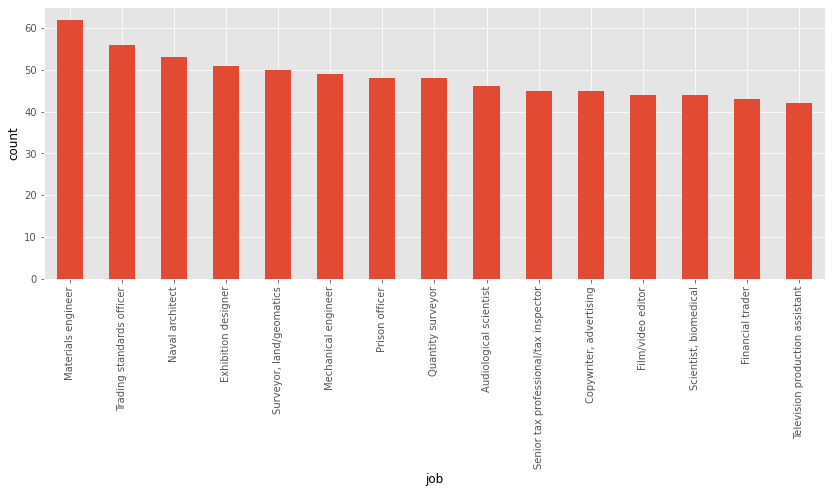

In [ ]:
## Plotting the bar plot for the top 15 jobs with high number of frauds 
fraud_train_cases.groupby('job')['is_fraud'].sum().sort_values(ascending=False).head(15).plot(kind='bar', figsize=(14,5))
plt.xlabel("{}".format('job'),fontdict={'fontsize':12,'fontweight':5,'color':'black'})
plt.ylabel("count",fontdict={'fontsize':12,'fontweight':5,'color':'black'})
plt.xticks(rotation=90)
plt.show()

## Inferences:


*   Materials Engineer ,Trading Standard Officers have reported with many fraud transactions




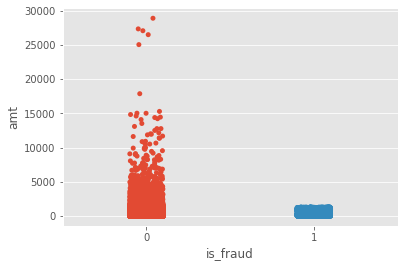

In [ ]:
# Plotting the strip plot for amount wrt is_fraud
sns.stripplot(data=dataset_train,x='is_fraud',y='amt')
plt.show()

# Inference


*   The value of amount in fraud transactions is very low (<1500) compared to non fraud transacation.




In [ ]:
#Calculating the mean and median value for the amount frauded
fraud_train_cases['amt'].mean()
fraud_train_cases['amt'].median()

396.505

In [ ]:
non_fraud_train_cases['amt'].mean()
non_fraud_train_cases['amt'].median()

47.28

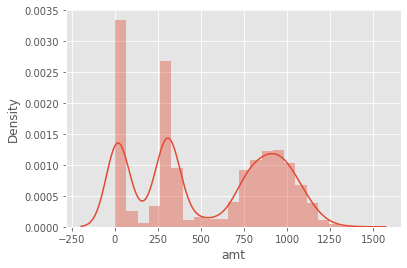

In [ ]:
#Plot the ditribution of fraud amount
sns.distplot(fraud_train_cases['amt'])
plt.show()

# Inference


*   The value of amount in fraud transactions is very low (<1500) compared to non fraud transacation.
*   Generally the fraud amount transaction is ranged high between (0-50,250-300.
*   Also the fraud amt transaction is more between the values 700-1250.






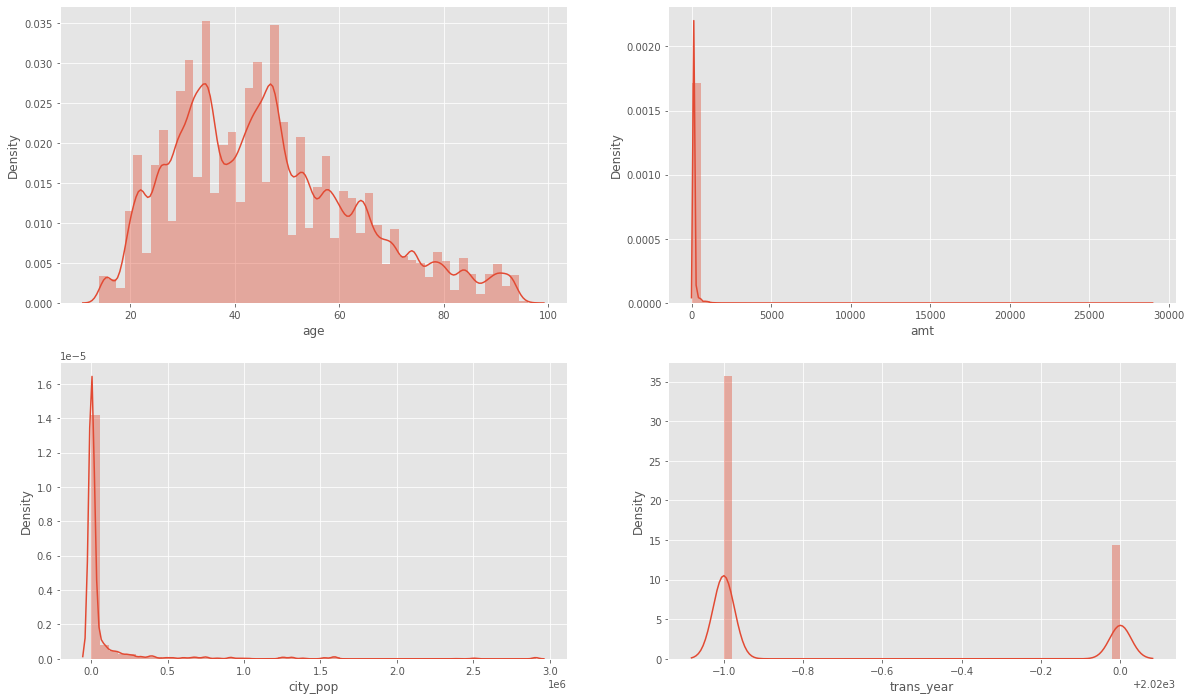

In [ ]:
#Plot the dist plot for  the numerical variables
plt.figure(figsize=(20, 12))

plt.subplot(2,2,1)
sns.distplot(dataset_train['age'])
plt.subplot(2,2,2)
sns.distplot(dataset_train['amt'])
plt.subplot(2,2,3)
sns.distplot(dataset_train['city_pop'])
plt.subplot(2,2,4)
sns.distplot(dataset_train['trans_year'])



plt.show()

Inferences:


*  20-30 age  tend to make more transaction
*   Year 2019 has more transaction compared to 2020
*   population is distributed between 0 -0.25e6
*   The amount spend peaks at 0-500 





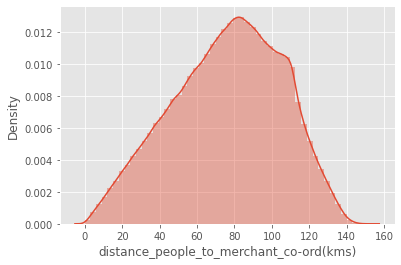

In [ ]:
#Plot the distribution of the  distance between people and merchant
sns.distplot(dataset_train['distance_people_to_merchant_co-ord(kms)'])
plt.show()

Inference:

*   The distance between the customer and merchant place where card is used is generally less than 140 km


In [ ]:
#Pairplot for all the numeric variables
#sns.pairplot(dataset_train)
#plt.show()

#colab is crashing

#Data Imbalance


In [ ]:
#Check the % of train Data set that has is_fraud Values = 1:

fraud = (sum(dataset_train['is_fraud'])/len(dataset_train['is_fraud'].index))*100
fraud

0.5788651743883394

There are few records having fraud values (0.59%).It is very low.We use undersampling,oversampling,SMOTE ,ADASYN techniques to adjust the imbalance.


###Plotting the imbalance data count in bar and pie chart


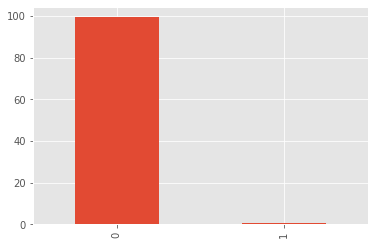

In [ ]:
round(100*dataset_train['is_fraud'].value_counts(normalize=True),2).plot(kind='bar', figsize=(6,4))
plt.show()

In [ ]:
fraud = (sum(dataset_test['is_fraud'])/len(dataset_test['is_fraud'].index))*100
fraud

0.3859864427885316

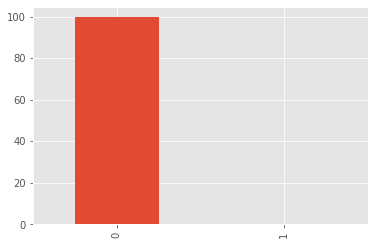

In [ ]:
round(100*dataset_test['is_fraud'].value_counts(normalize=True),2).plot(kind='bar', figsize=(6,4))
plt.show()

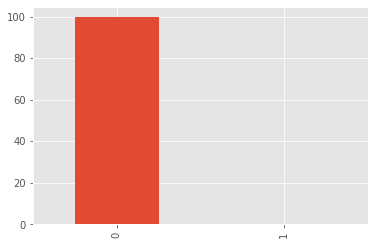

In [ ]:
round(100*dataset_test['is_fraud'].value_counts(normalize=True),2).plot(kind='bar', figsize=(6,4))
plt.show()

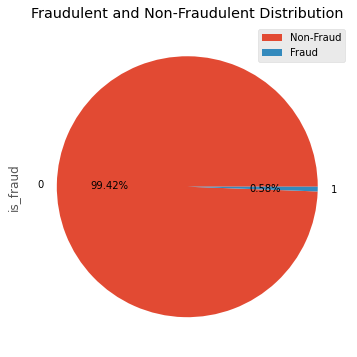

In [ ]:
#Fraud and non fraud cases count in pie chart for the training set
round(100*dataset_train['is_fraud'].value_counts(normalize=True),2).plot(kind='pie', figsize=(6, 6), autopct='%1.2f%%')
plt.title("Fraudulent and Non-Fraudulent Distribution")
plt.legend(["Non-Fraud", "Fraud"])
plt.show()

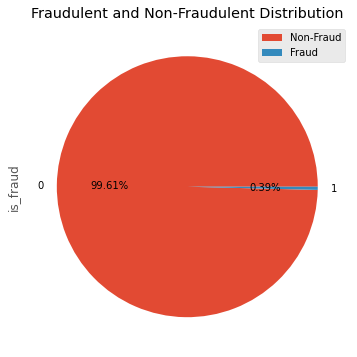

In [ ]:
#Fraud and non fraud cases count in pie chart for the testing set
round(100*dataset_test['is_fraud'].value_counts(normalize=True),2).plot(kind='pie', figsize=(6, 6), autopct='%1.2f%%')
plt.title("Fraudulent and Non-Fraudulent Distribution")
plt.legend(["Non-Fraud", "Fraud"])
plt.show()

The test set has 0.39% of records as fraud

We will be building the model on the train dataset. If required, a validation dataset will be carved from it. The final evaluation will be done on the test dataset.

In [ ]:
fraud_train_cases['job'].value_counts(normalize=True).sort_values(ascending=False).head(100)

Materials engineer           0.008260
Trading standards officer    0.007461
Naval architect              0.007061
Exhibition designer          0.006795
Surveyor, land/geomatics     0.006661
                               ...   
Human resources officer      0.003064
Arboriculturist              0.003064
Engineer, electronics        0.003064
Building control surveyor    0.003064
Social researcher            0.003064
Name: job, Length: 100, dtype: float64

In [ ]:
#import the label encoder to convert alphabetic data to numeric values
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [ ]:
dataset_train.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'Name', 'Transaction_Date', 'age', 'age_range', 'trans_year',
       'trans_month', 'trans_time', 'Month_name',
       'distance_people_to_merchant_co-ord(kms)'],
      dtype='object')

In [ ]:
# Transforming alphabetic job data into numeric to be processed by the model
dataset_train.job = label_encoder.fit_transform(dataset_train.job)
dataset_test.job = label_encoder.fit_transform(dataset_test.job)

In [ ]:
fraud_train_cases['state'].value_counts(normalize=True).sort_values(ascending=False).head(10)

NY    0.073941
TX    0.063816
PA    0.061018
CA    0.043432
OH    0.042766
FL    0.037437
IL    0.033040
MI    0.031708
AL    0.028644
MN    0.027578
Name: state, dtype: float64

In [ ]:
# Transforming alphabetic state data into numeric to be processed by the model
dataset_train.state = label_encoder.fit_transform(dataset_train.state)
dataset_test.state = label_encoder.fit_transform(dataset_test.state)

In [ ]:
# Transforming alphabetic city data into numeric to be processed by the model
dataset_train.city = label_encoder.fit_transform(dataset_train.city)
dataset_test.city = label_encoder.fit_transform(dataset_test.city)

In [ ]:
#Checking correlations of numeric values
Correlation=dataset_train.corr()
Correlation

,cc_num,amt,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,age,trans_year,trans_month,trans_time,distance_people_to_merchant_co-ord(kms)
cc_num,1.000000,0.001769,0.049188,-0.036373,0.041459,-0.059271,-0.048278,-0.008991,0.029165,-0.058942,-0.048252,-0.000981,-0.000279,0.000466,-0.000281,-0.000801,0.003730
amt,0.001769,1.000000,-0.000565,0.001718,0.001843,-0.001926,-0.000187,0.005818,-0.000628,-0.001873,-0.000151,0.219404,-0.009724,0.000842,-0.001748,-0.022811,-0.001085
city,0.049188,-0.000565,1.000000,-0.043064,0.074757,-0.032044,-0.066703,0.034923,0.020446,-0.031828,-0.066718,-0.002092,-0.018071,-0.000216,-0.000338,0.006939,0.003149
state,-0.036373,0.001718,-0.043064,1.000000,-0.116264,0.213270,0.132465,-0.012197,0.042915,0.211844,0.132346,0.001730,-0.051506,0.000811,0.000276,0.006881,-0.015866
zip,0.041459,0.001843,0.074757,-0.116264,1.000000,-0.114290,-0.909732,0.078467,-0.005678,-0.113561,-0.908924,-0.002162,0.011004,0.000086,0.000852,0.005938,0.006183
lat,-0.059271,-0.001926,-0.032044,0.213270,-0.114290,1.000000,-0.015533,-0.155730,-0.027593,0.993592,-0.015509,0.001894,0.047868,0.001274,-0.001072,-0.011508,-0.072634
long,-0.048278,-0.000187,-0.066703,0.132465,-0.909732,-0.015533,1.000000,-0.052715,-0.002729,-0.015452,0.999120,0.001721,-0.030220,0.000191,-0.001213,-0.002290,0.004058
city_pop,-0.008991,0.005818,0.034923,-0.012197,0.078467,-0.155730,-0.052715,1.000000,-0.054945,-0.154781,-0.052687,0.002136,-0.091295,-0.001673,0.000137,0.020381,0.010901
job,0.029165,-0.000628,0.020446,0.042915,-0.005678,-0.027593,-0.002729,-0.054945,1.000000,-0.027412,-0.002727,-0.000093,-0.026334,-0.000545,0.000960,0.011845,0.002150
merch_lat,-0.058942,-0.001873,-0.031828,0.211844,-0.113561,0.993592,-0.015452,-0.154781,-0.027412,1.000000,-0.015431,0.001741,0.047480,0.001244,-0.001116,-0.011378,-0.072662


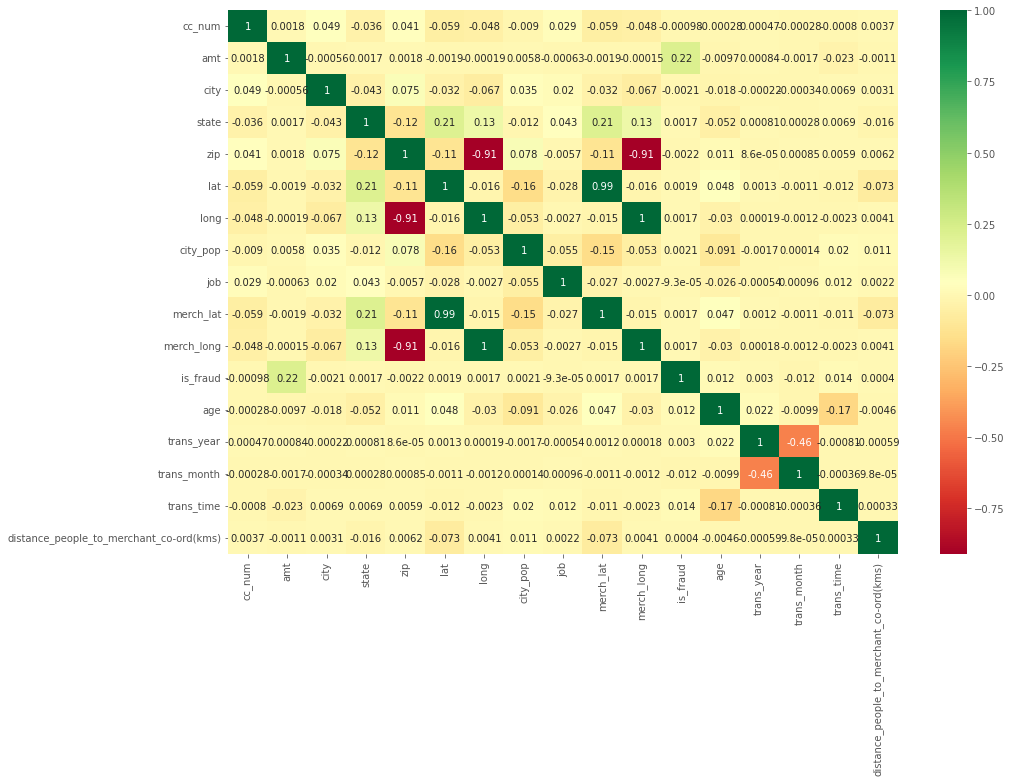

In [ ]:
#Plot the heatmap
plt.figure(figsize=[15,10])
sns.heatmap(Correlation,cmap="RdYlGn",annot=True)
plt.show()

## Inference

* zip ,merch_long,long are highly correlated hence we will be dropping those 
columns



In [ ]:
#Function for plotting box plot on  variable
def box_plot(variable):
  plt.figure(figsize=(6,4))
  sns.boxplot(y=dataset_train[variable ])
  plt.title("Boxplot for {}".format(variable))
  plt.show()

In [ ]:
dataset_train.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'Name', 'Transaction_Date', 'age', 'age_range', 'trans_year',
       'trans_month', 'trans_time', 'Month_name',
       'distance_people_to_merchant_co-ord(kms)'],
      dtype='object')

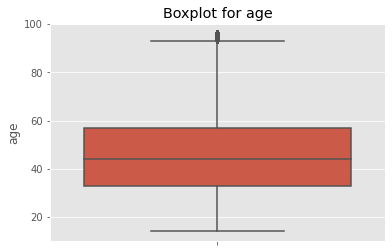

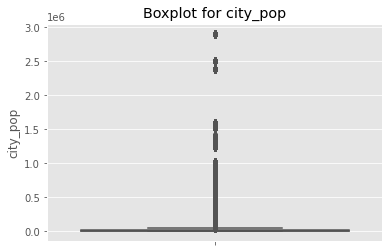

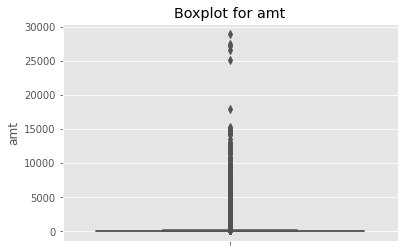

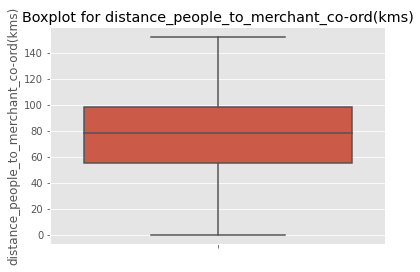

In [ ]:
#Boxplot for the columns 'age','city_pop','amt','distance_people_to_merchant_co-ord(kms)'
columns=['age','city_pop','amt','distance_people_to_merchant_co-ord(kms)']
for col in columns:
  box_plot(col)

###Inference:

The age ,distance_people_to_merchant column has no outliers while amt and city_pop stastically shows outliers. However, both amount and city  population can vary drastically and none of them seems very high or very low. Hence, we will consider it as valid data.

## Bivariate Analysis

In [ ]:
#Function for plotting box plot on  variable
def box_plot_target(variable):
  plt.figure(figsize=(6,4))
  sns.boxplot(y=dataset_train[variable],x=dataset_train['is_fraud'])
  plt.title("Boxplot for {} wrt is_fraud variable".format(variable))
  plt.show()

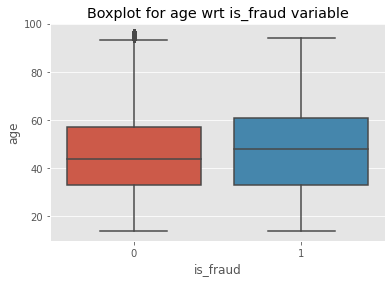

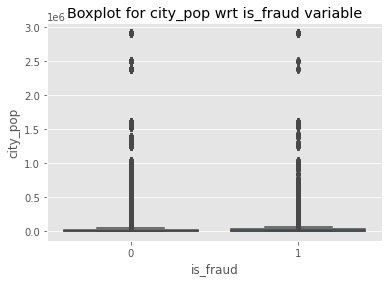

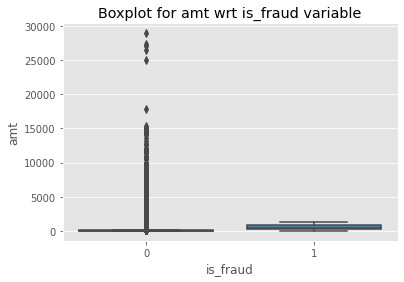

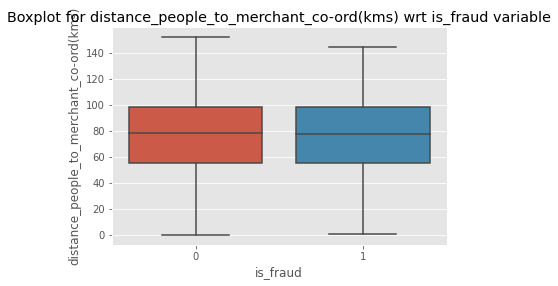

In [ ]:
#Boxplot for the fraud and non fraud cases for 'age','city_pop','amt','distance_people_to_merchant_co-ord(kms)'
columns=['age','city_pop','amt','distance_people_to_merchant_co-ord(kms)']
for col in columns:
  box_plot_target(col)

The age ,amt ,distance_people_to_merchant column has no outliers for fraud cases while amt and city_pop stastically shows outliers. However city population can vary drastically and none of them seems very high or very low. Hence, we will consider it as valid data.

In [ ]:
fraud_train_cases.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'Name', 'Transaction_Date', 'age', 'age_range', 'trans_year',
       'trans_month', 'trans_time', 'Month_name',
       'distance_people_to_merchant_co-ord(kms)'],
      dtype='object')

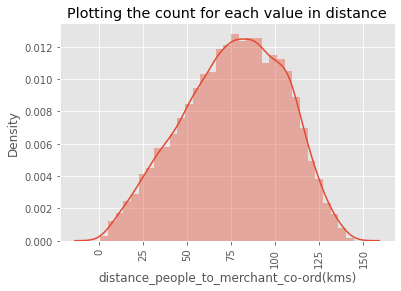

In [ ]:
#Distribution of the distance between client latitude,longitude and merchant lat and longitude
sns.distplot(fraud_train_cases['distance_people_to_merchant_co-ord(kms)'])
plt.title("Plotting the count for each value in distance")
plt.xticks(rotation=90)
plt.show()

The fraud cases also have same ditribution as non-fraud cases

In [ ]:
#Function for the bivariate chart
    
def bivariatechart(col_name):
    fig, ax =plt.subplots(figsize=(10,8))
    graph=sns.countplot(x=col_name, data=dataset_train,hue=dataset_train['is_fraud'])
    plt.title("Plotting the count for each value in the {} column".format(col_name))
    plt.xticks(rotation=90)
    plt.show()

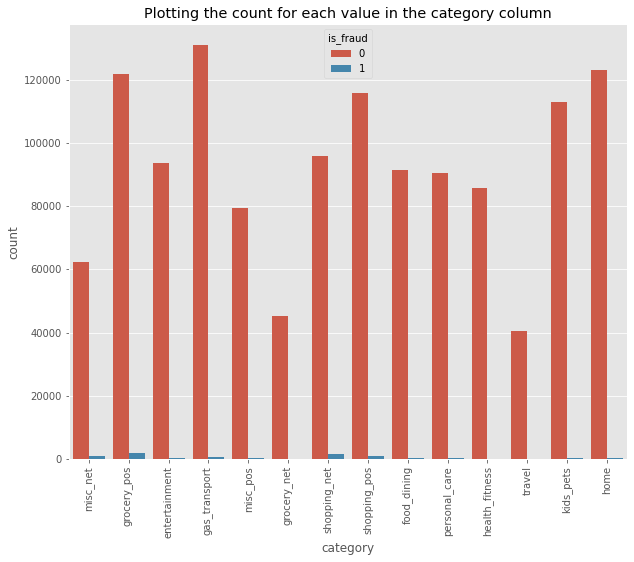

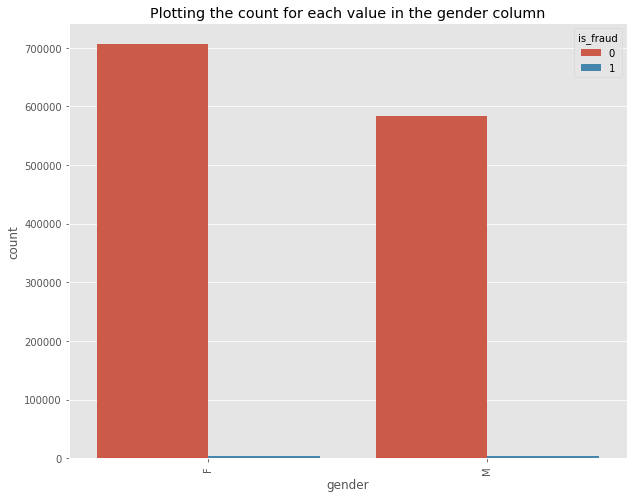

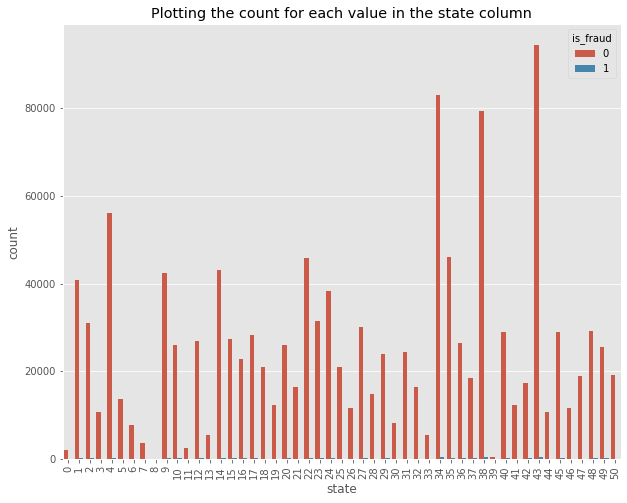

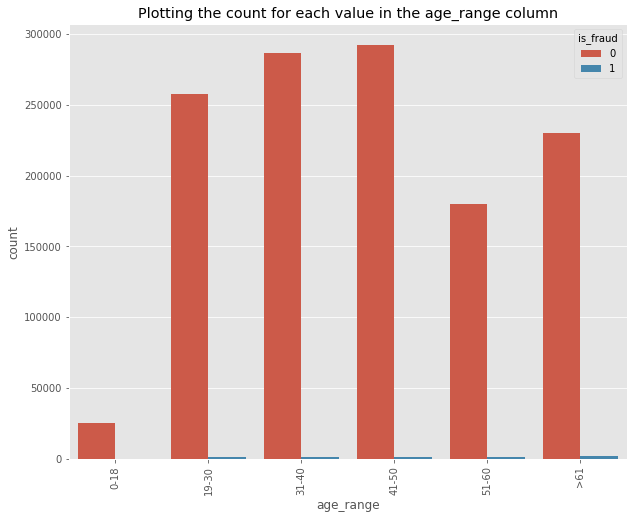

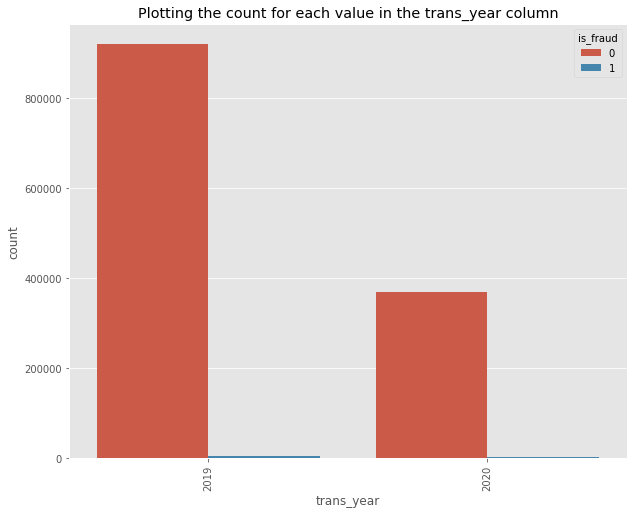

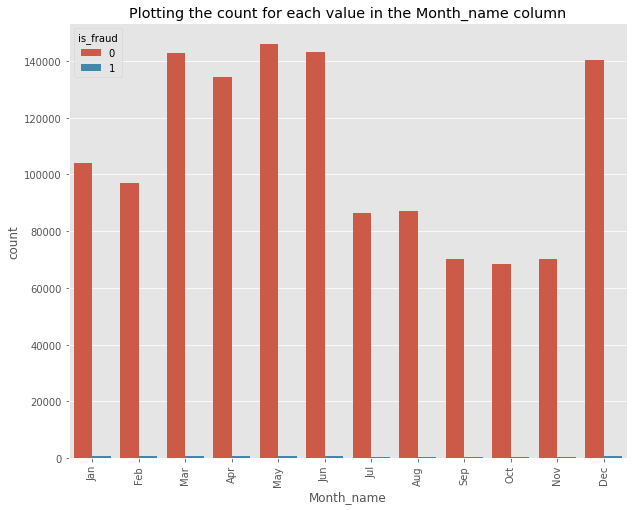

In [ ]:
#bivariate analysis of the columns 'category','gender','state','age_range','trans_year','Month_name' wrt is_fraud
col_name=['category','gender','state','age_range','trans_year','Month_name']
for i in col_name:
    bivariatechart(i)

Inferences:


*   Year 2019 has more transactions compared to 2020
*   Jan-July ,dec have more transaction reported .And also fraud cases are more during the same period relatively.



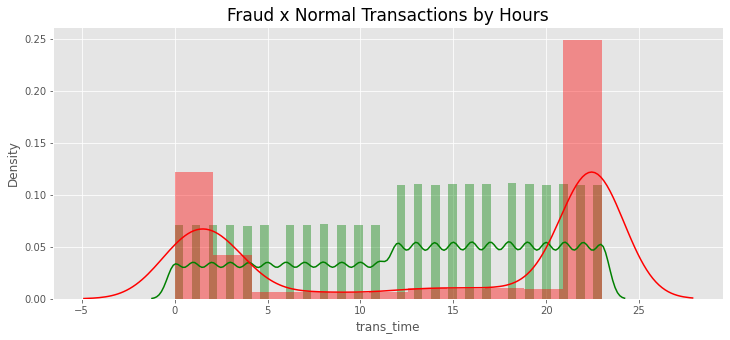

In [ ]:
plt.figure(figsize=(12,5))
sns.distplot(dataset_train[dataset_train['is_fraud'] == 0]["trans_time"], color='g')
sns.distplot(dataset_train[dataset_train['is_fraud'] == 1]["trans_time"], color='r')
plt.title('Fraud x Normal Transactions by Hours', fontsize=17)
plt.show()

## Inferences:


*   The Fraud transactions tend to happen more at odd times(0-5,20-24 hrs)
*   Mostly fraud transactions happens more during night compared to daytime.



In [ ]:
# Count of values for Category
dataset_train['category'].value_counts(dropna=False)

gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: category, dtype: int64

In [ ]:
#Drop all rows which have Nan Values. 
#dataset_train = dataset_train.dropna()

No records have null values


In [ ]:
dataset_train.shape

(1296675, 28)

In [ ]:
dataset_train.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,...,is_fraud,Name,Transaction_Date,age,age_range,trans_year,trans_month,trans_time,Month_name,distance_people_to_merchant_co-ord(kms)
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,526,27,28654,...,0,Jennifer Banks,2019-01-01,31,19-30,2019,1,0,Jan,78.597568
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,612,47,99160,...,0,Stephanie Gill,2019-01-01,41,31-40,2019,1,0,Jan,30.212176


In [ ]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(dataset_train[['category', 'gender']], drop_first=True)
dummy2 = pd.get_dummies(dataset_test[['category', 'gender']], drop_first=True)

# Adding the results to the master dataframe
dataset_train = pd.concat([dataset_train, dummy1], axis=1)
dataset_test = pd.concat([dataset_test, dummy2], axis=1)

In [ ]:
dataset_train.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'Name', 'Transaction_Date', 'age', 'age_range', 'trans_year',
       'trans_month', 'trans_time', 'Month_name',
       'distance_people_to_merchant_co-ord(kms)', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_M'],
      dtype='object')

In [ ]:
 #Drop all the unwanted columns
 dataset_train.drop(['age_range','unix_time','Month_name','cc_num','trans_num','Transaction_Date','trans_date_trans_time','merchant','category','gender','street','zip','lat', 'long', 'merch_lat', 'merch_long','Name' ],axis=1,inplace=True)
 dataset_test.drop(['age_range','unix_time','Month_name','cc_num','trans_num','Transaction_Date','trans_date_trans_time','merchant','category','gender','street','zip','lat', 'long', 'merch_lat', 'merch_long','Name' ],axis=1,inplace=True)

### Step 3:Train-Test Split

In [ ]:
X=dataset_train.drop('is_fraud',axis=1)
y=dataset_train['is_fraud']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, random_state=42, stratify=y)

In [ ]:
# Inspecting the train and validation datasets
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((907672, 24), (907672,), (389003, 24), (389003,))

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 907672 entries, 192318 to 33493
Data columns (total 24 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   amt                                      907672 non-null  float64
 1   city                                     907672 non-null  int64  
 2   state                                    907672 non-null  int64  
 3   city_pop                                 907672 non-null  int64  
 4   job                                      907672 non-null  int64  
 5   age                                      907672 non-null  int64  
 6   trans_year                               907672 non-null  int64  
 7   trans_month                              907672 non-null  int64  
 8   trans_time                               907672 non-null  int64  
 9   distance_people_to_merchant_co-ord(kms)  907672 non-null  float64
 10  category_food_dining        

Applying a power transform featurewise to make data more Gaussian-like.

In [ ]:
#Normalisation using power transformer
scaler = PowerTransformer()

X_train[['amt','city_pop','distance_people_to_merchant_co-ord(kms)','trans_year','trans_time','city', 'state','job','trans_month','age']] = scaler.fit_transform(X_train[['amt','city_pop','distance_people_to_merchant_co-ord(kms)','trans_year','trans_time','city', 'state','job','trans_month','age']])
X_valid[['amt','city_pop','distance_people_to_merchant_co-ord(kms)','trans_year','trans_time','city', 'state','job','trans_month','age']] = scaler.transform(X_valid[['amt','city_pop','distance_people_to_merchant_co-ord(kms)','trans_year','trans_time','city', 'state','job','trans_month','age']])
dataset_test[['amt','city_pop','distance_people_to_merchant_co-ord(kms)','trans_year','trans_time','city', 'state','job','trans_month','age']] = scaler.transform(dataset_test[['amt','city_pop','distance_people_to_merchant_co-ord(kms)','trans_year','trans_time','city', 'state','job','trans_month','age']])


X_train.head()

,amt,city,state,city_pop,job,age,trans_year,trans_month,trans_time,distance_people_to_merchant_co-ord(kms),...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
192318,1.448604,-1.671751,-1.798598,0.115628,1.079135,0.029042,-7.516210e-14,-0.530876,1.471953,-0.802454,...,0,0,0,0,0,0,1,0,0,0
318906,-0.700614,0.844208,1.116243,-1.249354,-1.582986,1.004526,-7.516210e-14,0.090398,-0.103264,-0.831062,...,0,0,1,0,0,0,0,0,0,0
212432,0.223218,0.740290,-0.496550,0.188953,-2.106785,2.150840,-7.516210e-14,-0.530876,0.618721,-2.089612,...,0,0,0,0,0,1,0,0,0,0
979043,1.228818,-0.574732,-1.230059,1.499245,0.582130,-0.554236,1.864620e-13,-1.302103,1.471953,-0.088932,...,0,1,0,0,0,0,0,0,0,0
614236,0.922072,0.119239,-0.856037,-1.130588,1.120797,-0.030889,-7.516210e-14,0.867868,1.471953,-0.922064,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
X_train.describe()

,amt,city,state,city_pop,job,age,trans_year,trans_month,trans_time,distance_people_to_merchant_co-ord(kms),...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
count,9.076720e+05,9.076720e+05,9.076720e+05,9.076720e+05,9.076720e+05,9.076720e+05,9.076720e+05,9.076720e+05,9.076720e+05,9.076720e+05,...,907672.000000,907672.000000,907672.000000,907672.000000,907672.000000,907672.000000,907672.000000,907672.000000,907672.000000,907672.000000
mean,-1.163564e-15,3.594782e-16,1.405517e-15,-1.012320e-15,-6.216071e-18,1.426379e-15,-7.826146e-17,2.521685e-15,-1.276880e-15,6.033299e-16,...,0.066187,0.094954,0.087079,0.048569,0.061455,0.070036,0.075271,0.089833,0.031300,0.453537
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.183477e-13,1.000001e+00,1.000001e+00,1.000001e+00,...,0.248609,0.293151,0.281951,0.214966,0.240163,0.255208,0.263828,0.285943,0.174127,0.497837
min,-2.008745e+00,-2.168280e+00,-1.984753e+00,-2.835873e+00,-2.196840e+00,-2.606359e+00,-7.516210e-14,-1.793305e+00,-1.922300e+00,-2.453822e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-9.266443e-01,-7.776869e-01,-7.831466e-01,-6.849488e-01,-7.938425e-01,-6.994904e-01,-7.516210e-14,-8.910483e-01,-8.397087e-01,-7.299072e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.159058e-01,7.931668e-02,1.258314e-01,-1.066617e-01,8.519507e-02,2.904199e-02,-7.516210e-14,9.039827e-02,1.869557e-01,5.469141e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.726671e-01,8.892021e-01,7.912833e-01,7.447690e-01,8.740120e-01,7.249195e-01,1.864620e-13,8.678684e-01,9.045199e-01,7.671537e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,7.283901e+00,1.552368e+00,1.564102e+00,2.111704e+00,1.573343e+00,2.248488e+00,1.864620e-13,1.530685e+00,1.471953e+00,2.709138e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


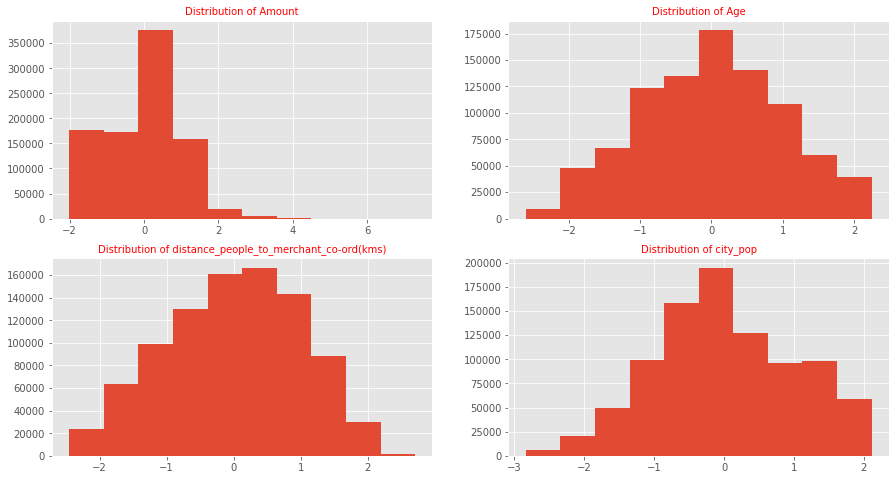

In [ ]:
# Lets check the distribution after scaling
plt.figure(figsize=[15,8])
plt.subplot(2,2,1)
plt.title('Distribution of Amount', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X_train.amt)
plt.subplot(2,2,2)
plt.title('Distribution of Age', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X_train.age)
plt.subplot(2,2,3)
plt.title('Distribution of distance_people_to_merchant_co-ord(kms)', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X_train['distance_people_to_merchant_co-ord(kms)'])
plt.subplot(2,2,4)
plt.title('Distribution of city_pop', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X_train.city_pop)
plt.show()

Quite evident that post scaling Skewness in data has been handled and date is more normally distributed.

## Step 4:Model Building and Hyper parameter Tuning

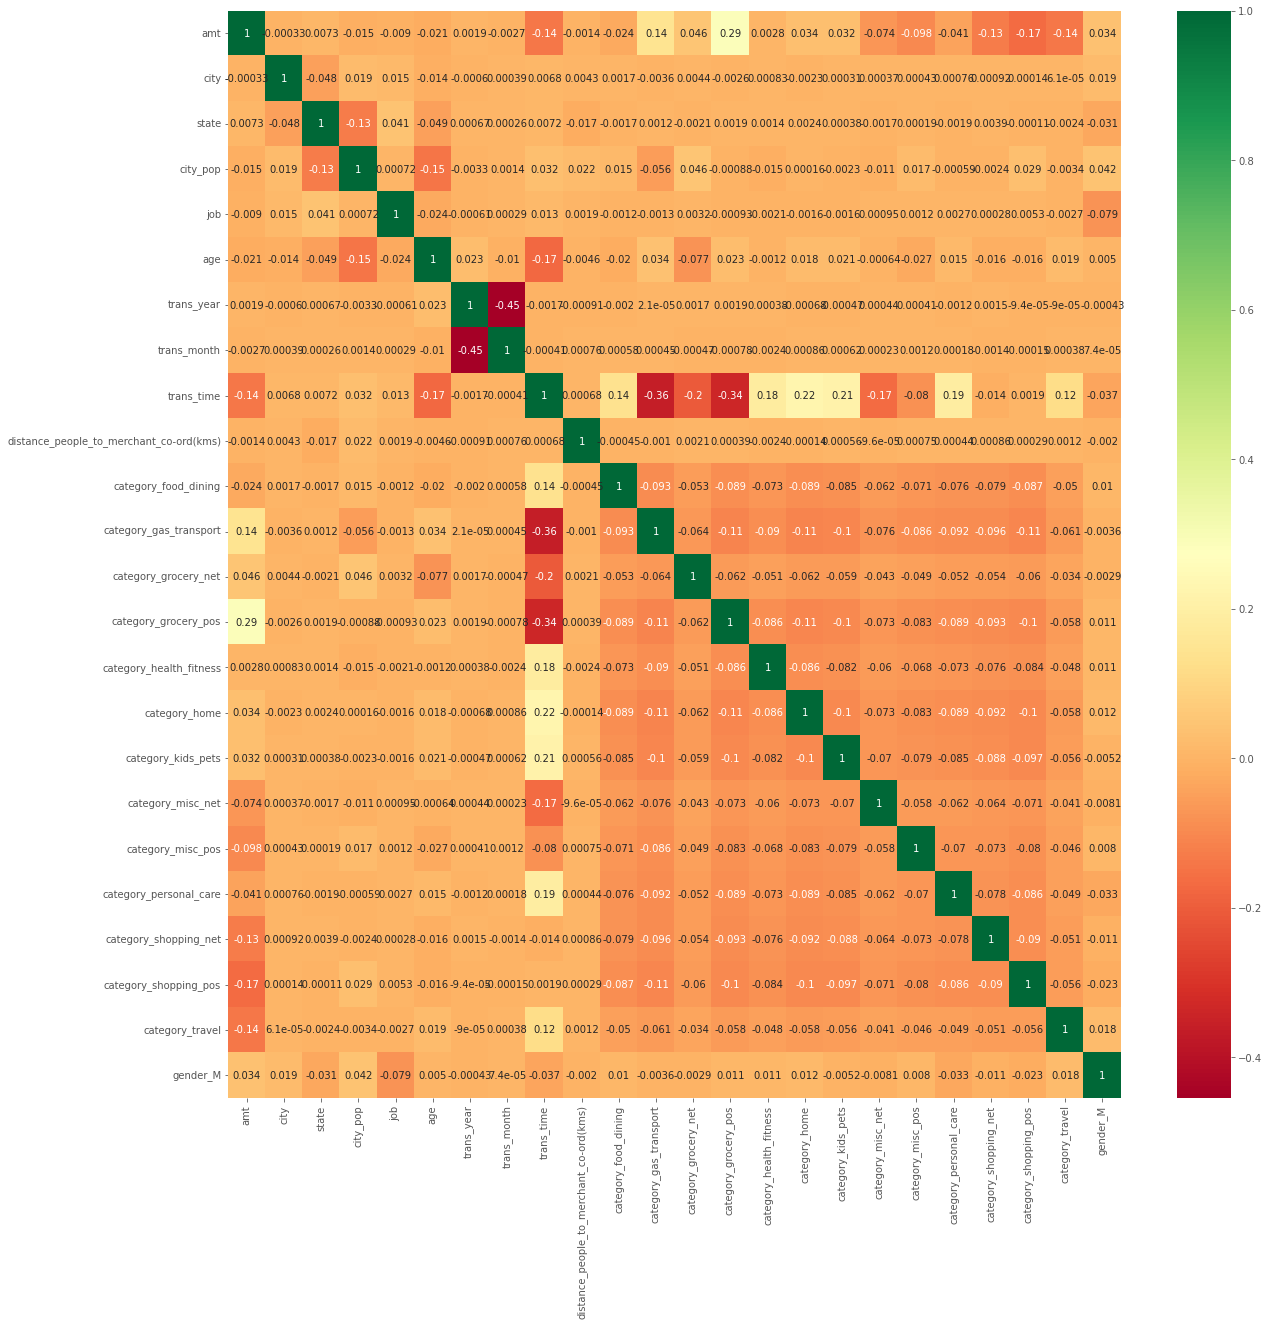

In [ ]:
# Let's examine any correlation in variables and remove variables with high correlation
plt.figure(figsize = (20,20))
sns.heatmap(X_train.corr(),cmap='RdYlGn',annot=True)
plt.show()

No two variables are highly correlated

In [ ]:
X_train.columns

Index(['amt', 'city', 'state', 'city_pop', 'job', 'age', 'trans_year',
       'trans_month', 'trans_time', 'distance_people_to_merchant_co-ord(kms)',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M'],
      dtype='object')

## Data Imbalance

Lets handle data imbalance before moving. We will use the following techinques:-

*   Random Under Sampling
*   Random Over Sampling
*   SMOTE
*   ADASYN





In [ ]:
# Address imbalance using under sampling
from imblearn import under_sampling
us = under_sampling.RandomUnderSampler(sampling_strategy='majority',random_state=100)
X_train_us, y_train_us = us.fit_resample(X_train, y_train)
print (X_train_us.shape)
print (y_train_us.shape)
print (y_train_us.value_counts())


# Address imbalance using over sampling
from imblearn import over_sampling
ro = over_sampling.RandomOverSampler(sampling_strategy='minority',random_state=100)
X_train_ro, y_train_ro = ro.fit_resample(X_train, y_train)
print (X_train_ro.shape)
print (y_train_ro.shape)
print (y_train_ro.value_counts())


#Address imbalnce using SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority',random_state=40)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
print (X_train_smote.shape)
print (y_train_smote.shape)
print (y_train_smote.value_counts())



#Address imbalnce using ADASYN
from imblearn.over_sampling import ADASYN
ada = ADASYN(sampling_strategy='minority',random_state=40)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)
print (X_train_ada.shape)
print (y_train_ada.shape)
print (y_train_ada.value_counts())


(10508, 24)
(10508,)
0    5254
1    5254
Name: is_fraud, dtype: int64
(1804836, 24)
(1804836,)
0    902418
1    902418
Name: is_fraud, dtype: int64
(1804836, 24)
(1804836,)
0    902418
1    902418
Name: is_fraud, dtype: int64
(1803747, 24)
(1803747,)
0    902418
1    901329
Name: is_fraud, dtype: int64


In [ ]:
# Function to draw ROC curve
from sklearn import metrics
from sklearn.metrics import precision_recall_curve, confusion_matrix, accuracy_score
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

    # Function to return various standard metrices for a model
def model_metrics(a, p):
  confusion = confusion_matrix(a, p)
  TP = confusion[1,1] # true positive 
  TN = confusion[0,0] # true negatives
  FP = confusion[0,1] # false positives
  FN = confusion[1,0] # false negatives
  print ('Accuracy    : ', metrics.accuracy_score(a, p ))
  print ('Sensitivity : ', TP / float(TP+FN))
  print ('Specificity : ', TN / float(TN+FP))
  print ('Precision   : ', TP / float(TP + FP))
  print ('Recall      : ', TP / float(TP + FN))
  print('F1_score:',metrics.f1_score(a,p))
  print(confusion)

  
  return None

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier




In [ ]:
#Logistic regression parameters
params_LR = {'C':np.logspace(-1, 5, 10), 'class_weight':[None,'balanced'], 'penalty':['l1','l2']}

#Decision tree parameters
params_DT = {
    'max_depth': [10, 20, 50, 100, 200],
    'min_samples_leaf': [10, 20, 50, 100, 200],
    'min_samples_split' : [10, 20, 50, 100, 200],
    'criterion': ["gini", "entropy"]
} 

#Random forest parameters
params_RF = {    
    'n_estimators': [10,15,50],
    'max_features':['sqrt',0.3],
    'max_depth': [10,50],
    'min_samples_leaf': [50,200],
    'min_samples_split' : [50,100],
    'criterion': ["gini"]
    
}




## 1.Logistic Regression model

In [ ]:
#logistic regression
model_LR = LogisticRegression()

# Decision Tree
model_DT = DecisionTreeClassifier(random_state = 23)

# Random Forest
model_RF = RandomForestClassifier(oob_score = True, random_state=23)


In [ ]:
def model_fit_evaluation(model_model, params, X_train, y_train, X_test, y_test, algo=None, sampling=None):
    
    rcv = RandomizedSearchCV(model_model, params, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1, random_state=23)
    rcv.fit(X_train, y_train)
    
    print('\n')
    print('best estimator : ', rcv.best_estimator_)
    print('best parameters: ', rcv.best_params_)
    print('best score: ', rcv.best_score_)
    print('\n')
    y_train_pred= (rcv.best_estimator_).predict(X_train)
    y_test_pred= (rcv.best_estimator_).predict(X_valid)
    draw_roc(y_train, y_train_pred)
    print("Training set metrics")
    print ('AUC for the {} Model {} sampling technique'.format(algo,sampling), metrics.roc_auc_score( y_train, y_train_pred))
    model_metrics(y_train, y_train_pred)
    print('*'*50)
    print("Validation set metrics")
    draw_roc(y_test, y_test_pred)
    print ('AUC for the {} Model {} sampling technique'.format(algo,sampling), metrics.roc_auc_score( y_test, y_test_pred))
    model_metrics(y_test, y_test_pred)

### 1.1 Logistic Regression without sampling

Fitting 5 folds for each of 10 candidates, totalling 50 fits


best estimator :  LogisticRegression(C=215.44346900318823, class_weight='balanced')
best parameters:  {'penalty': 'l2', 'class_weight': 'balanced', 'C': 215.44346900318823}
best score:  0.8603852940815973




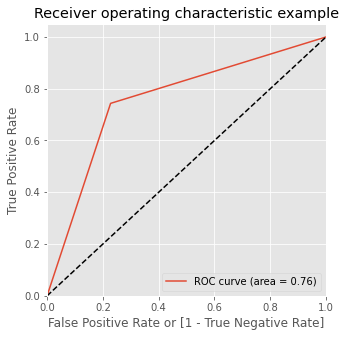

Training set metrics
AUC for the Logistic Regression Model actual sampling technique 0.7578676618598517
Accuracy    :  0.772134647758221
Sensitivity :  0.7434335744194899
Specificity :  0.7723017493002134
Precision   :  0.018654631420588867
Recall      :  0.7434335744194899
F1_score: 0.036395995136019085
[[696939 205479]
 [  1348   3906]]
**************************************************
Validation set metrics


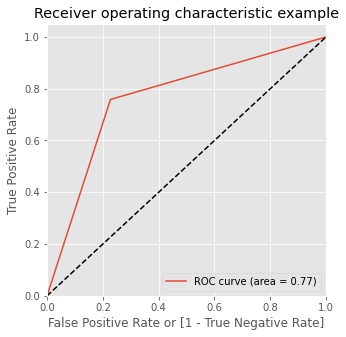

AUC for the Logistic Regression Model actual sampling technique 0.7655652433887072
Accuracy    :  0.7726110081413254
Sensitivity :  0.7584369449378331
Specificity :  0.7726935418395815
Precision   :  0.01905845858579096
Recall      :  0.7584369449378331
F1_score: 0.037182571213984834
[[298840  87911]
 [   544   1708]]


In [ ]:
#Logistic Regression without sampling
model_fit_evaluation(model_LR, params_LR, X_train, y_train, X_valid, y_valid, 'Logistic Regression', 'actual')


### 1.2 Logistic Regression with under sampling

Fitting 5 folds for each of 10 candidates, totalling 50 fits


best estimator :  LogisticRegression(C=215.44346900318823, class_weight='balanced')
best parameters:  {'penalty': 'l2', 'class_weight': 'balanced', 'C': 215.44346900318823}
best score:  0.8610556018482175




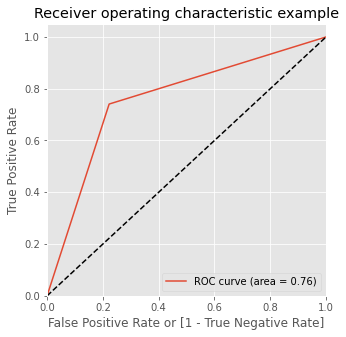

Training set metrics
AUC for the Logistic Regression Model Under sampling sampling technique 0.7591358964598401
Accuracy    :  0.7591358964598401
Sensitivity :  0.7407689379520366
Specificity :  0.7775028549676437
Precision   :  0.7690179806362379
Recall      :  0.7407689379520366
F1_score: 0.7546291808046535
[[4085 1169]
 [1362 3892]]
**************************************************
Validation set metrics


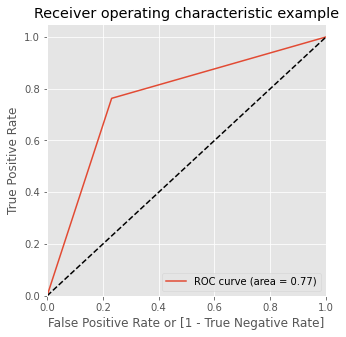

AUC for the Logistic Regression Model Under sampling sampling technique 0.7657092207605563
Accuracy    :  0.7685082120189305
Sensitivity :  0.7628774422735346
Specificity :  0.7685409992475779
Precision   :  0.01883049268372883
Recall      :  0.7628774422735346
F1_score: 0.03675377325189599
[[297234  89517]
 [   534   1718]]


In [ ]:
#Logistic Regression with under sampling
model_fit_evaluation(model_LR, params_LR, X_train_us, y_train_us, X_valid, y_valid, 'Logistic Regression', 'Under sampling')

### 1.3 Logistic Regression with over sampling

Fitting 5 folds for each of 10 candidates, totalling 50 fits


best estimator :  LogisticRegression(C=21544.346900318822)
best parameters:  {'penalty': 'l2', 'class_weight': None, 'C': 21544.346900318822}
best score:  0.8611941631760031




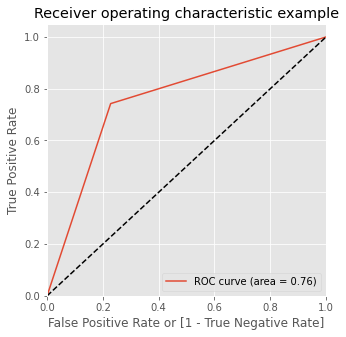

Training set metrics
AUC for the Logistic Regression Model Over sampling sampling technique 0.7572904130901643
Accuracy    :  0.7572904130901644
Sensitivity :  0.7424973792632682
Specificity :  0.7720834469170607
Precision   :  0.7651347064526406
Recall      :  0.7424973792632682
F1_score: 0.7536460913866593
[[696742 205676]
 [232375 670043]]
**************************************************
Validation set metrics


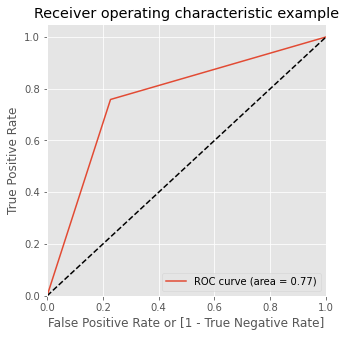

AUC for the Logistic Regression Model Over sampling sampling technique 0.7655199946369264
Accuracy    :  0.77252103454215
Sensitivity :  0.7584369449378331
Specificity :  0.7726030443360198
Precision   :  0.019051018359470855
Recall      :  0.7584369449378331
F1_score: 0.03716841120275064
[[298805  87946]
 [   544   1708]]


In [ ]:
#Logistic Regression with over sampling
model_fit_evaluation(model_LR, params_LR, X_train_ro, y_train_ro, X_valid, y_valid, 'Logistic Regression', 'Over sampling')

### 1.4 Logistic Regression with SMOTE

Fitting 5 folds for each of 10 candidates, totalling 50 fits


best estimator :  LogisticRegression(C=21544.346900318822)
best parameters:  {'penalty': 'l2', 'class_weight': None, 'C': 21544.346900318822}
best score:  0.8763238070956623




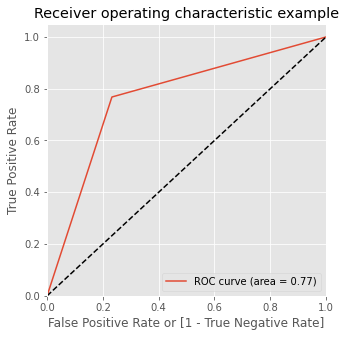

Training set metrics
AUC for the Logistic Regression Model SMOTE sampling technique 0.7677849954234068
Accuracy    :  0.767784995423407
Sensitivity :  0.7679755944584439
Specificity :  0.7675943963883699
Precision   :  0.767682955197494
Recall      :  0.7679755944584439
F1_score: 0.7678292469449031
[[692691 209727]
 [209383 693035]]
**************************************************
Validation set metrics


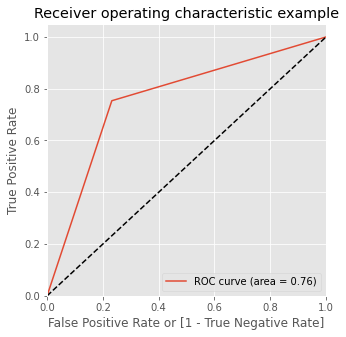

AUC for the Logistic Regression Model SMOTE sampling technique 0.7607493496177953
Accuracy    :  0.7678629727791303
Sensitivity :  0.7535523978685613
Specificity :  0.7679463013670295
Precision   :  0.018557805870259392
Recall      :  0.7535523978685613
F1_score: 0.03622353142076502
[[297004  89747]
 [   555   1697]]


In [ ]:
#Logistic Regression with SMOTE
model_fit_evaluation(model_LR, params_LR, X_train_smote, y_train_smote, X_valid, y_valid, 'Logistic Regression', 'SMOTE')

### 1.5 Logistic Regression with ADASYN

Fitting 5 folds for each of 10 candidates, totalling 50 fits


best estimator :  LogisticRegression(C=21544.346900318822)
best parameters:  {'penalty': 'l2', 'class_weight': None, 'C': 21544.346900318822}
best score:  0.8143294607986438




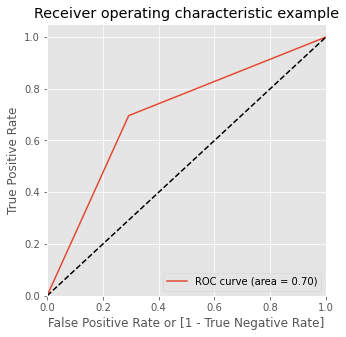

Training set metrics
AUC for the Logistic Regression Model ADASYN sampling technique 0.7017363247818768
Accuracy    :  0.7017397672733482
Sensitivity :  0.696034411408043
Specificity :  0.7074382381557105
Precision   :  0.7038117771652368
Recall      :  0.696034411408043
F1_score: 0.6999014892636685
[[638405 264013]
 [273973 627356]]
**************************************************
Validation set metrics


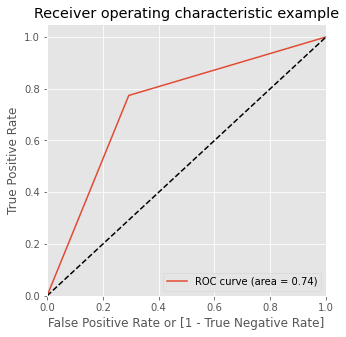

AUC for the Logistic Regression Model ADASYN sampling technique 0.7405824815442386
Accuracy    :  0.7075729493088743
Sensitivity :  0.7739786856127886
Specificity :  0.7071862774756885
Precision   :  0.015157971632069155
Recall      :  0.7739786856127886
F1_score: 0.029733625608788738
[[273505 113246]
 [   509   1743]]


In [ ]:
#Logistic Regression with ADASYN
model_fit_evaluation(model_LR, params_LR, X_train_ada, y_train_ada, X_valid, y_valid, 'Logistic Regression', 'ADASYN')

## 2.Decision Tree Model

### 2.1 Decision Tree without  sampling





Fitting 5 folds for each of 10 candidates, totalling 50 fits


best estimator :  DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=200,
                       random_state=23)
best parameters:  {'min_samples_split': 200, 'min_samples_leaf': 50, 'max_depth': 10, 'criterion': 'gini'}
best score:  0.9879603178346974




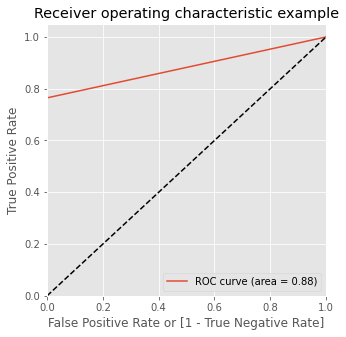

Training set metrics
AUC for the Decision Tree Model No Sampling sampling technique 0.8821376383527247
Accuracy    :  0.9981656369261143
Sensitivity :  0.7647506661591169
Specificity :  0.9995246105463322
Precision   :  0.9035304699797616
Recall      :  0.7647506661591169
F1_score: 0.828368209462942
[[901989    429]
 [  1236   4018]]
**************************************************
Validation set metrics


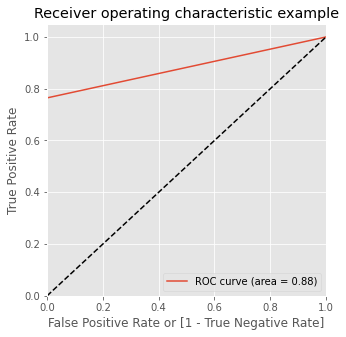

AUC for the Decision Tree Model No Sampling sampling technique 0.8820928199161268
Accuracy    :  0.9981722505996098
Sensitivity :  0.7646536412078153
Specificity :  0.999531998624438
Precision   :  0.9048870204939569
Recall      :  0.7646536412078153
F1_score: 0.8288808664259929
[[386570    181]
 [   530   1722]]


In [ ]:
#Decision Tree without  sampling
model_fit_evaluation(model_DT, params_DT, X_train, y_train, X_valid, y_valid, 'Decision Tree', 'No Sampling')

### 2.2 Decision Tree with under sampling

Fitting 5 folds for each of 10 candidates, totalling 50 fits


best estimator :  DecisionTreeClassifier(criterion='entropy', max_depth=100, min_samples_leaf=20,
                       min_samples_split=100, random_state=23)
best parameters:  {'min_samples_split': 100, 'min_samples_leaf': 20, 'max_depth': 100, 'criterion': 'entropy'}
best score:  0.9896078300369696




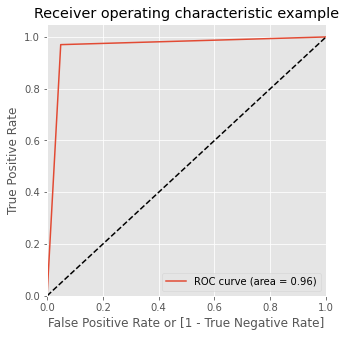

Training set metrics
AUC for the Decision Tree Model Under sampling sampling technique 0.9606966121050627
Accuracy    :  0.9606966121050629
Sensitivity :  0.9703083365055196
Specificity :  0.951084887704606
Precision   :  0.9520074696545284
Recall      :  0.9703083365055196
F1_score: 0.961070788952776
[[4997  257]
 [ 156 5098]]
**************************************************
Validation set metrics


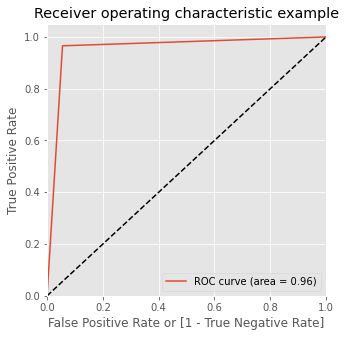

AUC for the Decision Tree Model Under sampling sampling technique 0.9552583907409219
Accuracy    :  0.9448307596599512
Sensitivity :  0.9658081705150977
Specificity :  0.9447086109667461
Precision   :  0.09232140583216605
Recall      :  0.9658081705150977
F1_score: 0.1685327960946883
[[365367  21384]
 [    77   2175]]


In [ ]:
#Decision Tree with under sampling
model_fit_evaluation(model_DT, params_DT, X_train_us, y_train_us, X_valid, y_valid, 'Decision Tree', 'Under sampling')

### 2.3 Decision Tree with over sampling

Fitting 5 folds for each of 10 candidates, totalling 50 fits


best estimator :  DecisionTreeClassifier(criterion='entropy', max_depth=100, min_samples_leaf=20,
                       min_samples_split=20, random_state=23)
best parameters:  {'min_samples_split': 20, 'min_samples_leaf': 20, 'max_depth': 100, 'criterion': 'entropy'}
best score:  0.9994789129594673




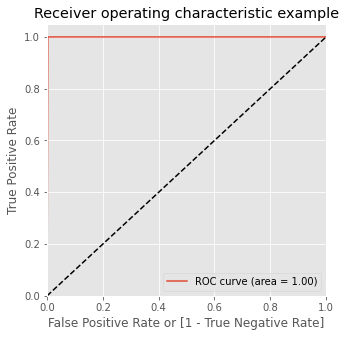

Training set metrics
AUC for the Decision Tree Model Over sampling sampling technique 0.9986469684780224
Accuracy    :  0.9986469684780224
Sensitivity :  1.0
Specificity :  0.9972939369560447
Precision   :  0.9973012399708242
Recall      :  1.0
F1_score: 0.9986487966986816
[[899976   2442]
 [     0 902418]]
**************************************************
Validation set metrics


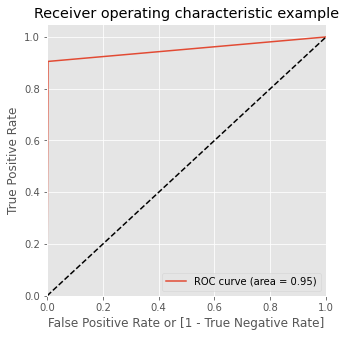

AUC for the Decision Tree Model Over sampling sampling technique 0.9510926765254615
Accuracy    :  0.9962391035544713
Sensitivity :  0.905417406749556
Specificity :  0.996767946301367
Precision   :  0.6199452721191852
Recall      :  0.905417406749556
F1_score: 0.7359682367803645
[[385501   1250]
 [   213   2039]]


In [ ]:
#Decision Tree with over sampling
model_fit_evaluation(model_DT, params_DT, X_train_ro, y_train_ro, X_valid, y_valid, 'Decision Tree', 'Over sampling')

### 2.4 Decision Tree with SMOTE

Fitting 5 folds for each of 10 candidates, totalling 50 fits


best estimator :  DecisionTreeClassifier(criterion='entropy', max_depth=100, min_samples_leaf=20,
                       min_samples_split=100, random_state=23)
best parameters:  {'min_samples_split': 100, 'min_samples_leaf': 20, 'max_depth': 100, 'criterion': 'entropy'}
best score:  0.9990728324306696




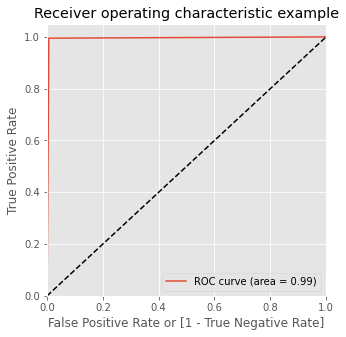

Training set metrics
AUC for the Decision Tree Model SMOTE sampling technique 0.9945651571666344
Accuracy    :  0.9945651571666345
Sensitivity :  0.9953391887129911
Specificity :  0.9937911256202779
Precision   :  0.993800722492988
Recall      :  0.9953391887129911
F1_score: 0.9945693606528061
[[896815   5603]
 [  4206 898212]]
**************************************************
Validation set metrics


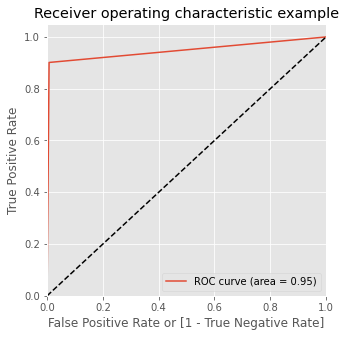

AUC for the Decision Tree Model SMOTE sampling technique 0.9471035076460378
Accuracy    :  0.9922571291223975
Sensitivity :  0.9014209591474245
Specificity :  0.9927860561446512
Precision   :  0.4211618257261411
Recall      :  0.9014209591474245
F1_score: 0.5740950226244343
[[383961   2790]
 [   222   2030]]


In [ ]:
#Decision Tree with SMOTE
model_fit_evaluation(model_DT, params_DT, X_train_smote, y_train_smote, X_valid, y_valid, 'Decision Tree', 'SMOTE')

### 2.5 Decision Tree with ADASYN

Fitting 5 folds for each of 10 candidates, totalling 50 fits


best estimator :  DecisionTreeClassifier(criterion='entropy', max_depth=100, min_samples_leaf=200,
                       min_samples_split=20, random_state=23)
best parameters:  {'min_samples_split': 20, 'min_samples_leaf': 200, 'max_depth': 100, 'criterion': 'entropy'}
best score:  0.995739544111885




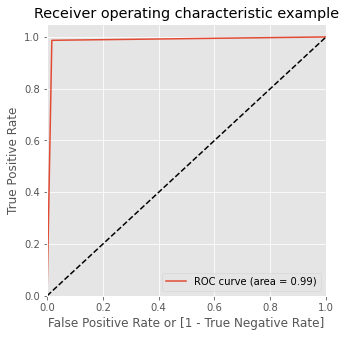

Training set metrics
AUC for the Decision Tree Model ADASYN sampling technique 0.985000795245639
Accuracy    :  0.9849995592508262
Sensitivity :  0.9870480146539166
Specificity :  0.9829535758373614
Precision   :  0.9830029236341458
Recall      :  0.9870480146539166
F1_score: 0.9850213162662957
[[887035  15383]
 [ 11674 889655]]
**************************************************
Validation set metrics


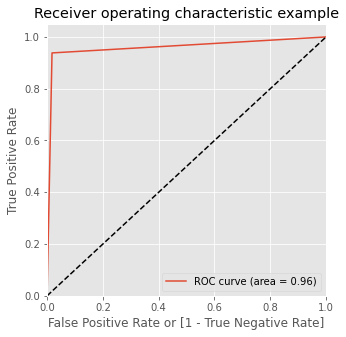

AUC for the Decision Tree Model ADASYN sampling technique 0.9602672025248661
Accuracy    :  0.9820027094906723
Sensitivity :  0.9382770870337478
Specificity :  0.9822573180159845
Precision   :  0.23543175487465182
Recall      :  0.9382770870337478
F1_score: 0.37641400195956176
[[379889   6862]
 [   139   2113]]


In [ ]:
#Decision Tree with ADASYN
model_fit_evaluation(model_DT, params_DT, X_train_ada, y_train_ada, X_valid, y_valid, 'Decision Tree', 'ADASYN')

## 3.Random Forest Model

###3.1 Random Forest with out sampling

Fitting 5 folds for each of 10 candidates, totalling 50 fits


best estimator :  RandomForestClassifier(max_depth=50, max_features=0.3, min_samples_leaf=200,
                       min_samples_split=100, n_estimators=15, oob_score=True,
                       random_state=23)
best parameters:  {'n_estimators': 15, 'min_samples_split': 100, 'min_samples_leaf': 200, 'max_features': 0.3, 'max_depth': 50, 'criterion': 'gini'}
best score:  0.9911956884336721




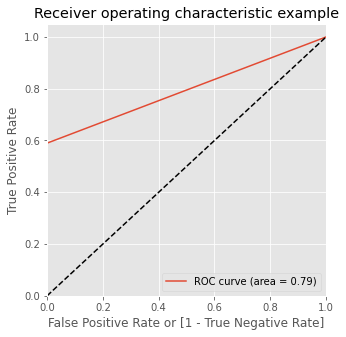

Training set metrics
AUC for the Random Forest Model No sampling sampling technique 0.7948195336749215
Accuracy    :  0.9974296882574322
Sensitivity :  0.5898363151884278
Specificity :  0.9998027521614152
Precision   :  0.9456820262435154
Recall      :  0.5898363151884278
F1_score: 0.7265267846676824
[[902240    178]
 [  2155   3099]]
**************************************************
Validation set metrics


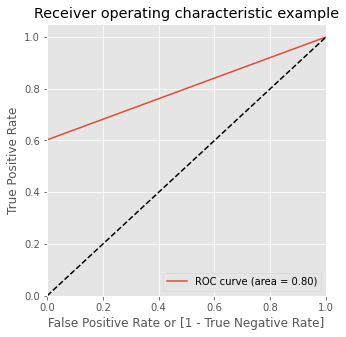

AUC for the Random Forest Model No sampling sampling technique 0.8011649261868053
Accuracy    :  0.9974550324804693
Sensitivity :  0.6025754884547069
Specificity :  0.9997543639189039
Precision   :  0.9345730027548209
Recall      :  0.6025754884547069
F1_score: 0.7327213822894167
[[386656     95]
 [   895   1357]]


In [ ]:
#Random Forest with out sampling
model_fit_evaluation(model_RF, params_RF, X_train, y_train, X_valid, y_valid, 'Random Forest', 'No sampling')

### 3.2 Random Forest with under sampling

Fitting 5 folds for each of 10 candidates, totalling 50 fits


best estimator :  RandomForestClassifier(max_depth=10, max_features=0.3, min_samples_leaf=50,
                       min_samples_split=50, n_estimators=50, oob_score=True,
                       random_state=23)
best parameters:  {'n_estimators': 50, 'min_samples_split': 50, 'min_samples_leaf': 50, 'max_features': 0.3, 'max_depth': 10, 'criterion': 'gini'}
best score:  0.9866860419023962




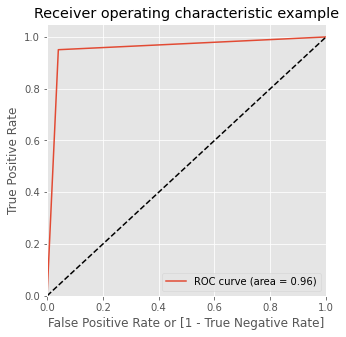

Training set metrics
AUC for the Random Forest Model under sampling sampling technique 0.9551770079939094
Accuracy    :  0.9551770079939094
Sensitivity :  0.9507042253521126
Specificity :  0.9596497906357061
Precision   :  0.9592855771077395
Recall      :  0.9507042253521126
F1_score: 0.9549756237453397
[[5042  212]
 [ 259 4995]]
**************************************************
Validation set metrics


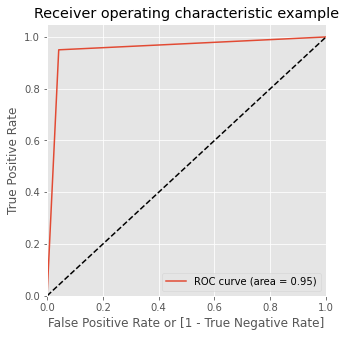

AUC for the Random Forest Model under sampling sampling technique 0.9542593193128199
Accuracy    :  0.9582059778459292
Sensitivity :  0.9502664298401421
Specificity :  0.9582522087854977
Precision   :  0.11702942141529038
Recall      :  0.9502664298401421
F1_score: 0.20839419612425747
[[370605  16146]
 [   112   2140]]


In [ ]:
#Random Forest with under sampling
model_fit_evaluation(model_RF, params_RF, X_train_us, y_train_us, X_valid, y_valid, 'Random Forest', 'under sampling')

### 3.3 Random Forest with over sampling

Fitting 5 folds for each of 10 candidates, totalling 50 fits


best estimator :  RandomForestClassifier(max_depth=50, max_features=0.3, min_samples_leaf=200,
                       min_samples_split=100, n_estimators=15, oob_score=True,
                       random_state=23)
best parameters:  {'n_estimators': 15, 'min_samples_split': 100, 'min_samples_leaf': 200, 'max_features': 0.3, 'max_depth': 50, 'criterion': 'gini'}
best score:  0.9996245155551386




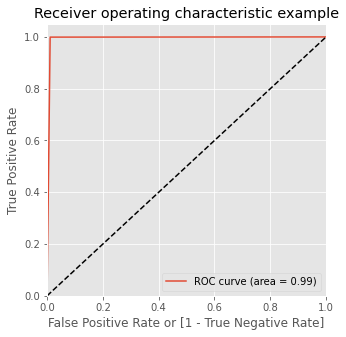

Training set metrics
AUC for the Random Forest Model over sampling sampling technique 0.9941440662752737
Accuracy    :  0.9941440662752737
Sensitivity :  0.9992730641454404
Specificity :  0.9890150684051072
Precision   :  0.9891266076178463
Recall      :  0.9992730641454404
F1_score: 0.9941739480831469
[[892505   9913]
 [   656 901762]]
**************************************************
Validation set metrics


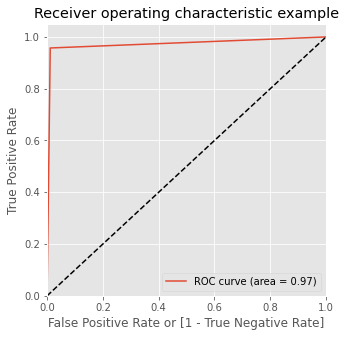

AUC for the Random Forest Model over sampling sampling technique 0.9729971982790383
Accuracy    :  0.9884422485173636
Sensitivity :  0.9573712255772646
Specificity :  0.988623170980812
Precision   :  0.3288590604026846
Recall      :  0.9573712255772646
F1_score: 0.4895549500454133
[[382351   4400]
 [    96   2156]]


In [ ]:
#Random Forest with over sampling
model_fit_evaluation(model_RF, params_RF, X_train_ro, y_train_ro, X_valid, y_valid, 'Random Forest', 'over sampling')

### 3.4 Random Forest with SMOTE

Fitting 5 folds for each of 10 candidates, totalling 50 fits


best estimator :  RandomForestClassifier(max_depth=50, max_features=0.3, min_samples_leaf=200,
                       min_samples_split=100, n_estimators=15, oob_score=True,
                       random_state=23)
best parameters:  {'n_estimators': 15, 'min_samples_split': 100, 'min_samples_leaf': 200, 'max_features': 0.3, 'max_depth': 50, 'criterion': 'gini'}
best score:  0.9991498660467272




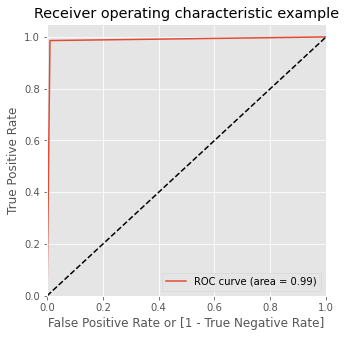

Training set metrics
AUC for the Random Forest Model SMOTE sampling technique 0.9878188378334652
Accuracy    :  0.9878188378334652
Sensitivity :  0.9860585670941847
Specificity :  0.9895791085727457
Precision   :  0.9895422917771766
Recall      :  0.9860585670941847
F1_score: 0.9877973578795989
[[893014   9404]
 [ 12581 889837]]
**************************************************
Validation set metrics


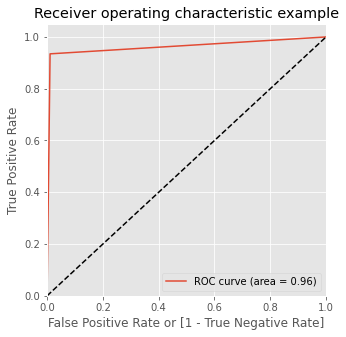

AUC for the Random Forest Model SMOTE sampling technique 0.9619790359421502
Accuracy    :  0.9889178232558617
Sensitivity :  0.9347246891651865
Specificity :  0.9892333827191139
Precision   :  0.3357792311373425
Recall      :  0.9347246891651865
F1_score: 0.494073465555686
[[382587   4164]
 [   147   2105]]


In [ ]:
#Random Forest with SMOTE
model_fit_evaluation(model_RF, params_RF, X_train_smote, y_train_smote, X_valid, y_valid, 'Random Forest', 'SMOTE')

### 3.5 Random Forest with ADASYN

Fitting 5 folds for each of 10 candidates, totalling 50 fits


best estimator :  RandomForestClassifier(max_depth=50, max_features=0.3, min_samples_leaf=200,
                       min_samples_split=100, n_estimators=15, oob_score=True,
                       random_state=23)
best parameters:  {'n_estimators': 15, 'min_samples_split': 100, 'min_samples_leaf': 200, 'max_features': 0.3, 'max_depth': 50, 'criterion': 'gini'}
best score:  0.9980054252920147




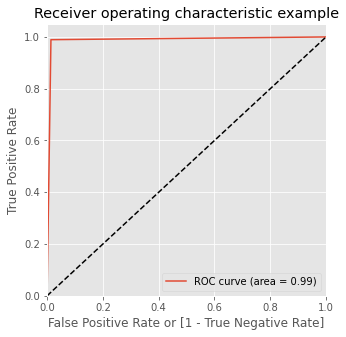

Training set metrics
AUC for the Random Forest Model ADASYN sampling technique 0.9877842000572701
Accuracy    :  0.9877832090642423
Sensitivity :  0.9894256148420832
Specificity :  0.9861427852724569
Precision   :  0.9861716703361595
Recall      :  0.9894256148420832
F1_score: 0.9877959628540035
[[889913  12505]
 [  9531 891798]]
**************************************************
Validation set metrics


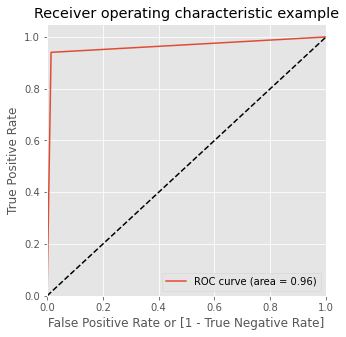

AUC for the Random Forest Model ADASYN sampling technique 0.9630825583901903
Accuracy    :  0.9854062822137618
Sensitivity :  0.9404973357015985
Specificity :  0.985667781078782
Precision   :  0.27646521341861374
Recall      :  0.9404973357015985
F1_score: 0.42731766367396345
[[381208   5543]
 [   134   2118]]


In [ ]:
#Random Forest with ADASYN
model_fit_evaluation(model_RF, params_RF, X_train_ada, y_train_ada, X_valid, y_valid, 'Random Forest', 'ADASYN')

## 4. XGBoost

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
def model_fit_evaluation1(model_model, params, X_train, y_train, X_test, y_test, algo=None, sampling=None):
    
    rcv = RandomizedSearchCV(model_model, params, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1, random_state=23)
    rcv.fit(X_train, y_train)
    
    print('\n')
    print('best estimator : ', rcv.best_estimator_)
    print('best parameters: ', rcv.best_params_)
    print('best score: ', rcv.best_score_)
    print('\n')
    y_train_pred= (rcv.best_estimator_).predict(X_train)
    y_test_pred= (rcv.best_estimator_).predict(X_valid)
    draw_roc(y_train, y_train_pred)
    print("Training set metrics")
    print ('AUC for the {} Model {} sampling technique'.format(algo,sampling), metrics.roc_auc_score(y_train, y_train_pred))
    model_metrics(y_train, y_train_pred)
    print('*'*50)
    print("Validation set metrics")
    draw_roc(y_test, y_test_pred)
    print ('AUC for the {} Model {} sampling technique'.format(algo,sampling), metrics.roc_auc_score(y_test, y_test_pred))
    model_metrics(y_test, y_test_pred)

In [ ]:
model_xgb = xgb.XGBClassifier()

params_XGB={
  'learning_rate':[0.3,0.5,0.7],
  'max_depth':[10],
  'n_estimators':[10,15,20],
  'max_features':[14]
}

Fitting 5 folds for each of 9 candidates, totalling 45 fits


best estimator :  XGBClassifier(learning_rate=0.7, max_depth=10, max_features=14, n_estimators=20)
best parameters:  {'n_estimators': 20, 'max_features': 14, 'max_depth': 10, 'learning_rate': 0.7}
best score:  0.9971970510757178




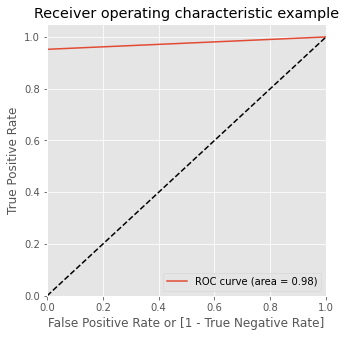

Training set metrics
AUC for the Xgboosting Model no sampling sampling technique 0.9761090048453444
Accuracy    :  0.9997146546329511
Sensitivity :  0.952226874762086
Specificity :  0.9999911349286029
Precision   :  0.9984035122729994
Recall      :  0.952226874762086
F1_score: 0.9747686312713102
[[902410      8]
 [   251   5003]]
**************************************************
Validation set metrics


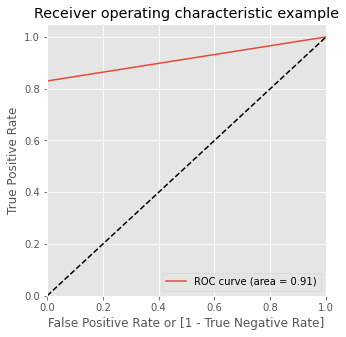

AUC for the Xgboosting Model no sampling sampling technique 0.9148158015511773
Accuracy    :  0.9987198042174482
Sensitivity :  0.8299289520426287
Specificity :  0.9997026510597258
Precision   :  0.9420362903225806
Recall      :  0.8299289520426287
F1_score: 0.8824362606232294
[[386636    115]
 [   383   1869]]


In [ ]:
model_fit_evaluation1(model_xgb, params_XGB, X_train, y_train, X_valid, y_valid, 'Xgboosting', 'no sampling')

Fitting 5 folds for each of 9 candidates, totalling 45 fits


best estimator :  XGBClassifier(learning_rate=0.5, max_depth=10, max_features=14, n_estimators=20)
best parameters:  {'n_estimators': 20, 'max_features': 14, 'max_depth': 10, 'learning_rate': 0.5}
best score:  0.9965612357075628




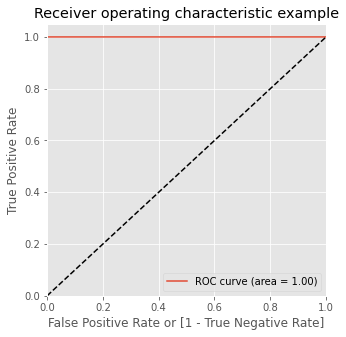

Training set metrics
AUC for the Xgboosting Model Under sampling sampling technique 0.9999048344118766
Accuracy    :  0.9999048344118767
Sensitivity :  1.0
Specificity :  0.9998096688237533
Precision   :  0.9998097050428164
Recall      :  1.0
F1_score: 0.999904843467504
[[5253    1]
 [   0 5254]]
**************************************************
Validation set metrics


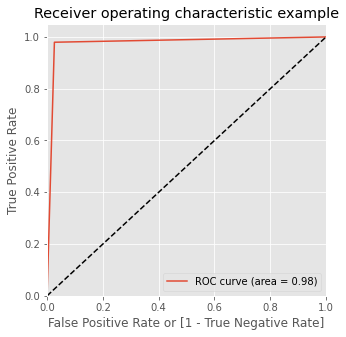

AUC for the Xgboosting Model Under sampling sampling technique 0.9766595468255187
Accuracy    :  0.9737791225260474
Sensitivity :  0.9795737122557726
Specificity :  0.9737453813952647
Precision   :  0.1784789644012945
Recall      :  0.9795737122557726
F1_score: 0.30194360799343006
[[376597  10154]
 [    46   2206]]


In [ ]:
model_fit_evaluation1(model_xgb, params_XGB, X_train_us, y_train_us, X_valid, y_valid, 'Xgboosting', 'Under sampling')

Fitting 5 folds for each of 9 candidates, totalling 45 fits


best estimator :  XGBClassifier(learning_rate=0.7, max_depth=10, max_features=14, n_estimators=20)
best parameters:  {'n_estimators': 20, 'max_features': 14, 'max_depth': 10, 'learning_rate': 0.7}
best score:  0.9999572730482509




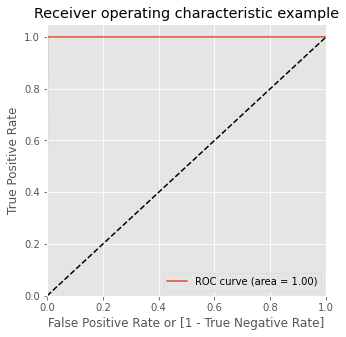

Training set metrics
AUC for the Xgboosting Model Over sampling sampling technique 0.9993744583995443
Accuracy    :  0.9993744583995443
Sensitivity :  1.0
Specificity :  0.9987489167990886
Precision   :  0.9987504800525042
Recall      :  1.0
F1_score: 0.9993748494572154
[[901289   1129]
 [     0 902418]]
**************************************************
Validation set metrics


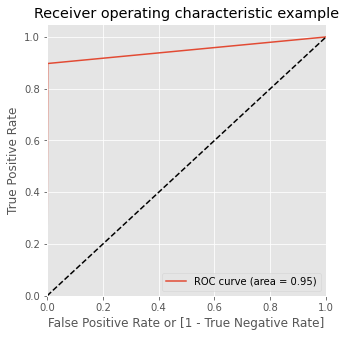

AUC for the Xgboosting Model Over sampling sampling technique 0.9476586062668921
Accuracy    :  0.9973110747217888
Sensitivity :  0.8974245115452931
Specificity :  0.9978927009884913
Precision   :  0.71262341325811
Recall      :  0.8974245115452931
F1_score: 0.7944182389937108
[[385936    815]
 [   231   2021]]


In [ ]:
model_fit_evaluation1(model_xgb, params_XGB, X_train_ro, y_train_ro, X_valid, y_valid, 'Xgboosting', 'Over sampling')

Fitting 5 folds for each of 9 candidates, totalling 45 fits


best estimator :  XGBClassifier(learning_rate=0.7, max_depth=10, max_features=14, n_estimators=20)
best parameters:  {'n_estimators': 20, 'max_features': 14, 'max_depth': 10, 'learning_rate': 0.7}
best score:  0.9998638650689239




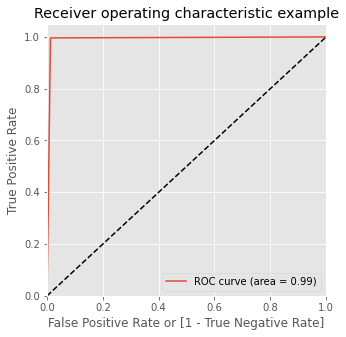

Training set metrics
AUC for the Xgboosting Model SMOTE sampling technique 0.9920757343049451
Accuracy    :  0.9920757343049451
Sensitivity :  0.9963232116380657
Specificity :  0.9878282569718246
Precision   :  0.9879307844111093
Recall      :  0.9963232116380657
F1_score: 0.9921092500863448
[[891434  10984]
 [  3318 899100]]
**************************************************
Validation set metrics


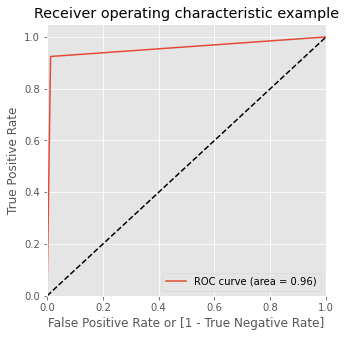

AUC for the Xgboosting Model SMOTE sampling technique 0.9559881741141474
Accuracy    :  0.9871003565525202
Sensitivity :  0.9245115452930728
Specificity :  0.9874648029352219
Precision   :  0.30043290043290044
Recall      :  0.9245115452930728
F1_score: 0.4534959703768242
[[381903   4848]
 [   170   2082]]


In [ ]:
model_fit_evaluation1(model_xgb, params_XGB, X_train_smote, y_train_smote, X_valid, y_valid, 'Xgboosting', 'SMOTE')

Fitting 5 folds for each of 9 candidates, totalling 45 fits


best estimator :  XGBClassifier(learning_rate=0.7, max_depth=10, max_features=14, n_estimators=20)
best parameters:  {'n_estimators': 20, 'max_features': 14, 'max_depth': 10, 'learning_rate': 0.7}
best score:  0.9998459307769607




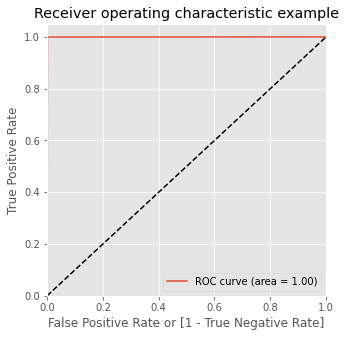

Training set metrics
AUC for the Xgboosting Model ADA sampling technique 0.9990555793625091
Accuracy    :  0.9990552998840746
Sensitivity :  0.9995184888093027
Specificity :  0.9985926699157154
Precision   :  0.9985922752489844
Recall      :  0.9995184888093027
F1_score: 0.999055167358472
[[901148   1270]
 [   434 900895]]
**************************************************
Validation set metrics


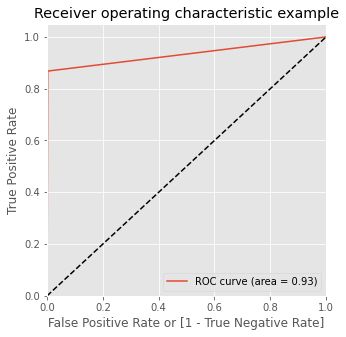

AUC for the Xgboosting Model ADA sampling technique 0.9329118819125563
Accuracy    :  0.9969563216736118
Sensitivity :  0.8681172291296625
Specificity :  0.99770653469545
Precision   :  0.6878958479943702
Recall      :  0.8681172291296625
F1_score: 0.7675696898311739
[[385864    887]
 [   297   1955]]


In [ ]:
model_fit_evaluation1(model_xgb, params_XGB, X_train_ada, y_train_ada, X_valid, y_valid, 'Xgboosting', 'ADA')

## Step 5:Model Evaluation

### Evaluating the Model developed on Test set

Oversampling data imbalance method of both Decision Tree and Random Forest are performing well with the training and validation set.
Also the Random forest has a higher recall value(95%) compared to decision tree(90%).Since the Random forest detects more fraud cases we proceed with that model for the testing set.

**We will proceed with building the model on complete training set and test set using Random forest Oversampling imbalance method.**

In [ ]:
scaler=PowerTransformer()
dataset_train[['amt','city_pop','distance_people_to_merchant_co-ord(kms)','trans_year','trans_time','city', 'state','job','trans_month','age']] = scaler.fit_transform(dataset_train[['amt','city_pop','distance_people_to_merchant_co-ord(kms)','trans_year','trans_time','city', 'state','job','trans_month','age']])



dataset_train_X=dataset_train.drop('is_fraud',axis=1)
dataset_train_y=dataset_train['is_fraud']

smk = SMOTE(sampling_strategy='minority', random_state=40)
ada = ADASYN(sampling_strategy='minority', random_state=40)
ro = over_sampling.RandomOverSampler(sampling_strategy='minority',random_state=100)
us= under_sampling.RandomUnderSampler(sampling_strategy='majority',random_state=100)
X_train_ro, y_train_ro = ro.fit_resample(dataset_train_X, dataset_train_y)
X_train_smk, y_train_smk = smk.fit_resample(dataset_train_X, dataset_train_y)
X_train_ada, y_train_ada = ada.fit_resample(dataset_train_X, dataset_train_y)
X_train_us, y_train_us = us.fit_resample(dataset_train_X, dataset_train_y)

dataset_test_X=dataset_test.drop('is_fraud',axis=1)
dataset_test_y=dataset_test['is_fraud']



### RANDOM FOREST

In [ ]:
# Random forest
model_RF = RandomForestClassifier(oob_score = True, random_state=40)

#Random forest parameters
params_RF = {    
    'n_estimators': [10,15,50],
    'max_features':['sqrt',0.3],
    'max_depth': [10,50],
    'min_samples_leaf': [50,200],
    'min_samples_split' : [50,100],
    'criterion': ["gini"]
    
}

rcv1 = RandomizedSearchCV(model_RF, params_RF, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1, random_state=40)
rcv1.fit(X_train_ro, y_train_ro)
rcv1.best_estimator_
y_train_pred= (rcv1.best_estimator_).predict(X_train_ro)
y_test_prob1=(rcv1.best_estimator_).predict_proba(dataset_test_X)[:,1]
y_test_pred1=(rcv1.best_estimator_).predict(dataset_test_X)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Training set


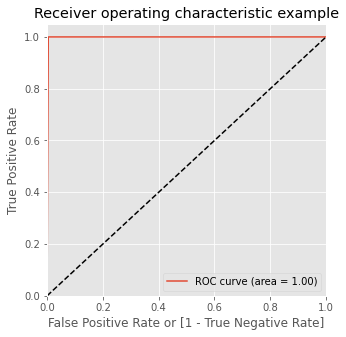

AUC for the Random Forest Model Over sampling technique 0.9978936043296107
Accuracy    :  0.9978936043296108
Sensitivity :  1.0
Specificity :  0.9957872086592215
Precision   :  0.9958048818167774
Recall      :  1.0
F1_score: 0.997898031906103
[[1283738    5431]
 [      0 1289169]]
**************************************************
Testing set


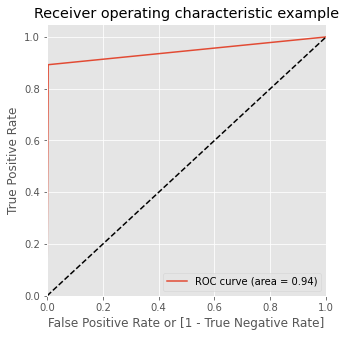

AUC for the Random Forest Over sampling technique 0.9444477295884695
Accuracy    :  0.9957226583939005
Sensitivity :  0.8927738927738927
Specificity :  0.9961215664030464
Precision   :  0.4714426390940423
Recall      :  0.8927738927738927
F1_score: 0.6170452714676977
[[551427   2147]
 [   230   1915]]


In [ ]:
print("Training set")
draw_roc(y_train_ro, y_train_pred)
print ('AUC for the Random Forest Model Over sampling technique', metrics.roc_auc_score(y_train_ro, y_train_pred))
model_metrics(y_train_ro, y_train_pred)
print('*'*50)
print("Testing set")
draw_roc(dataset_test_y, y_test_pred1)
print ('AUC for the Random Forest Over sampling technique', metrics.roc_auc_score(dataset_test_y, y_test_pred1))
model_metrics(dataset_test_y, y_test_pred1)

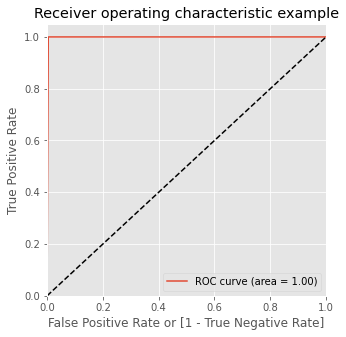

AUC for the Random Forest  0.9978936043296107
Accuracy    :  0.995811595041163
Sensitivity :  1.0
Specificity :  0.9957872086592215
Precision   :  0.5801963360902836
Recall      :  1.0
F1_score: 0.7343344910238223
[[1283738    5431]
 [      0    7506]]


In [ ]:
#applying the finalised model on training set with out sampling
y_train_pred1= (rcv1.best_estimator_).predict(dataset_train_X)
draw_roc(dataset_train_y, y_train_pred1)
print ('AUC for the Random Forest ', metrics.roc_auc_score(dataset_train_y, y_train_pred1))
model_metrics(dataset_train_y, y_train_pred1)

In [ ]:
# Extracting the features significance
imp_df = pd.DataFrame({
    "Varname": X_train_ro.columns,
    "Imp": rcv1.best_estimator_.feature_importances_})

imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,amt,0.566028
8,trans_time,0.198514
11,category_gas_transport,0.025040
5,age,0.024016
13,category_grocery_pos,0.021293
20,category_shopping_net,0.020340
3,city_pop,0.015866
4,job,0.011650
1,city,0.011608
9,distance_people_to_merchant_co-ord(kms),0.011252


From the above model build on test set we can see that the model has following features:



*   AUC-94.4%
*   Recall-89.2%
*   Precision-47%
*   F1-score-62%





High recall implies the more fraud cases are predicted correctly.
Even though the precision is 47% it implies 47% non-fraud cases are wrongly quoted as fraud by the machine learning model.But we can arrange a representive for verifying by calling the customer if the transaction was genuine or not and proceed further.

## Step 6: Cost-Benefit Analysis

###On the Test set

### Average number of transactions per month

In [ ]:
#Find the Average number of transactions per month
Avg_no_transactions_per_month_test =len(dataset_test)/12
Avg_no_transactions_per_month_test

46309.916666666664

### Average number of fraudulent transactions per month

In [ ]:
#Average number of fraudulent transactions per month
Avg_no_fraud_transactions_per_month_test =len(fraud_test_cases)/12
Avg_no_fraud_transactions_per_month_test

178.75

### Average amount per fraudulent transaction 

In [ ]:
#Average amount per fraudulent transaction 
Avg_amount_per_fraud_transactions_test = fraud_test_cases['amt'].mean()
Avg_amount_per_fraud_transactions_test

528.3564941724942

###Cost incurred per month before the model was deployed

In [ ]:
cost_incurred_before_deploy =Avg_no_fraud_transactions_per_month_test*Avg_amount_per_fraud_transactions_test
cost_incurred_before_deploy

94443.72333333334

### Average number of transactions per month detected as fraudulent by the model (TF)

In [ ]:
TF=(1915+2147)/12
TF

338.5

###Cost of providing customer executive support per fraudulent transaction detected by the model

Customer_service_cost =1.5

### Total cost of providing customer support per month for fraudulent transactions detected by the model (TF*$1.5)

In [ ]:
cust_support_fraud_trans_per_month = TF * 1.5
cust_support_fraud_trans_per_month

507.75

### Average number of transactions per month that are fraudulent but not detected by the model (FN)

In [ ]:
FN=230/12
FN

19.166666666666668

### Cost incurred due to fraudulent transactions left undetected by the model (FN*c)

In [ ]:
cost_undetected_fraud = FN * Avg_amount_per_fraud_transactions_test
cost_undetected_fraud

10126.832804972806

### Cost incurred per month after the model is built and deployed (4+6)

In [ ]:
#Cost incurred per month after the model is built and deployed 
cost_after_model_deploy = cust_support_fraud_trans_per_month + cost_undetected_fraud
cost_after_model_deploy

10634.582804972806

### Final savings = Cost incurred before - Cost incurred after(1-7)

In [ ]:
Final_savings=cost_incurred_before_deploy-cost_after_model_deploy
Final_savings

83809.14052836054

###On the Training set

### Average number of transactions per month

In [ ]:
#Find the Average number of transactions per month
Avg_no_transactions_per_month_train =len(dataset_train)/12
Avg_no_transactions_per_month_train

108056.25

### Average number of fraudulent transactions per month

In [ ]:
#Average number of fraudulent transactions per month
Avg_no_fraud_transactions_per_month_train =len(fraud_train_cases)/12
Avg_no_fraud_transactions_per_month_train

625.5

### Average amount per fraudulent transaction 

In [ ]:
#Average amount per fraudulent transaction 
Avg_amount_per_fraud_transactions_train= fraud_train_cases['amt'].mean()
Avg_amount_per_fraud_transactions_train

531.3200919264573

###Cost incurred per month before the model was deployed

In [ ]:
cost_incurred_before_deploy =Avg_no_fraud_transactions_per_month_train*Avg_amount_per_fraud_transactions_train
cost_incurred_before_deploy

332340.71749999904

### Average number of transactions per month detected as fraudulent by the model (TF)

In [ ]:
TF=(5431+7506)/12
TF

1078.0833333333333

###Cost of providing customer executive support per fraudulent transaction detected by the model

Customer_service_cost =1.5

### Total cost of providing customer support per month for fraudulent transactions detected by the model (TF*$1.5)

In [ ]:
cust_support_fraud_trans_per_month = TF * 1.5
cust_support_fraud_trans_per_month

1617.125

### Average number of transactions per month that are fraudulent but not detected by the model (FN)

In [ ]:
FN=0/12
FN

0.0

### Cost incurred due to fraudulent transactions left undetected by the model (FN*c)

In [ ]:
cost_undetected_fraud = FN * Avg_amount_per_fraud_transactions_train
cost_undetected_fraud

0.0

### Cost incurred per month after the model is built and deployed (4+6)

In [ ]:
#Cost incurred per month after the model is built and deployed 
cost_after_model_deploy = cust_support_fraud_trans_per_month + cost_undetected_fraud
cost_after_model_deploy

1617.125

### Final savings = Cost incurred before - Cost incurred after(1-7)

In [ ]:
Final_savings=cost_incurred_before_deploy-cost_after_model_deploy
Final_savings

330723.59249999904

##Conclusion



1.   Amount plays the most important role, since we can see that the mean amount in fraudulent transaction is higher than normal transaction.
2.  grocery_pos , shopping_net,misc_net,gas_transport Catergory have more chance of fraud.
3.   The Fraud transactions tend to happen more at odd times(0-5,20-24 hrs)
Mostly fraud transactions happens more during night compared to daytime.
2.   New york,Texas ,Pennsylvania have many fraud cases reported.





The top 10 important features and importance value based on the randomm forest model we selected:

- amt	0.566028
-trans_time	0.198514
-category_gas_transport	0.025040
-age	0.024016
-category_grocery_pos	0.021293
-category_shopping_net	0.020340
-city_pop	0.015866
-job	0.011650
-city	0.011608
-distance_people_to_merchant_co-ord(kms)	0.011252

Majorily it depends on the amt,time of transaction ,category,age,city_population,job ,city and distance between customer and mercant where the card is swiped.


- Accuracy cannot be counted on when dealing with unbalanced datasets since it cannot detect all fradualent transactions.
- Recall says out of fradualent transactions. what percentage were correctly identified. Recall is very effective in imbalanced data sets. 
We got best Recall score from Random forest oversampling model as 89%. Our model has correctly predicted 89% of all fradualent transactions .
- Precision says out of all  transactions predicted to be fraudalent, how many were actually fradualent. Our Random forest model gave 47.1% precision..
- F1-Score is the weighted average of Precision and Recall and F1 score takes both false positives and false negatives into consideration 
and is very effective in imbalanced datasets.  Random Forest predicted 62% F1-score.
- We got Area under curve in ROC as 94.4% in Random forest model. Higher the AUC score better is the model at predicting fradualent and non-fraudalent transactions.
-Based on the training set data before the model was deployed average cost for bank due to fraudulent transaction was 332340.71 per month.We make a average saving of 330723.59 after deploying the model for fraud analysis per month.
-Based on the test set data before the model was deployed average cost for bank due to fraudulent transaction was 94443.72 per month.We make a average saving of 83809.14 after deploying the model for fraud analysis per month.